In [1]:
%matplotlib inline

import setGPU

import os, h5py
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LogNorm, Normalize

import glob

from plots import plotHistogram, loadModel, plotSumHist

setGPU: Setting GPU to: 0


# Total energy

In [2]:
n_samples = 200

f = h5py.File('/mnt/ceph/users/vbarinpa/single_particle/all_noPU.h5', 'r')
X = np.asarray(f['image'])
#X = X.squeeze()
inp_sum = np.sum(X[0:n_samples], axis = (1, 2, 3))

In [3]:
all_g_weight1 = '../trial37/weights/generator_weights_step_*.h5'
gen_model1 = '../trial37/weights/generator_model_bs_128_lr_0.00005_latent_100_ncritic_5_clip_0.01.json'

In [3]:
gen_model2 = '../trial32/weights/generator_model_bs_128_lr_0.00005_latent_100_ncritic_5_clip_0.01.json'
all_g_weight2 = '../trial32/weights/generator_weights_*'

In [6]:
#all_g_weight2 = '/nfshome/vitoriabp/hgcal_wgan/trial26/weights/generator_weights_epoch_*.h5'
#gen_model2 = '/nfshome/vitoriabp/hgcal_wgan/trial26/weights/generator_model_change_discriminator.json'

## Model with energy constraint and regression on the normalized energy

/mnt/home/vbarinpa/tf9/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


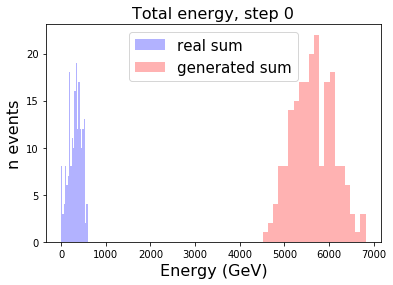

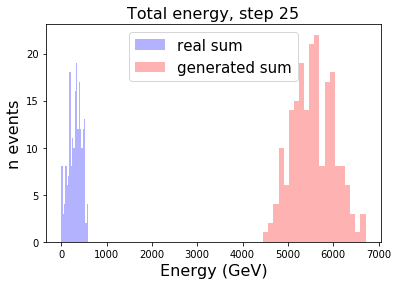

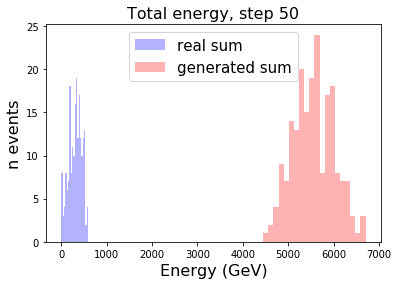

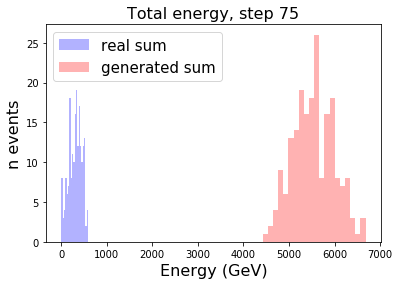

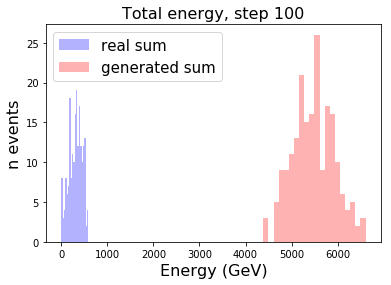

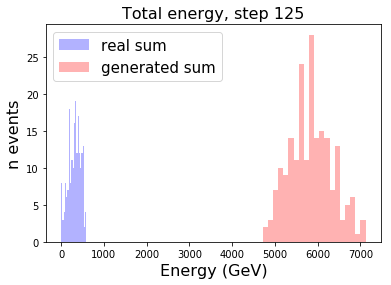

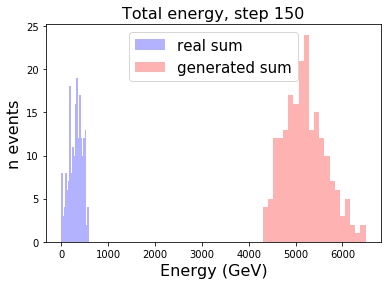

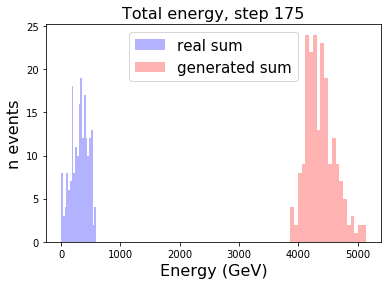

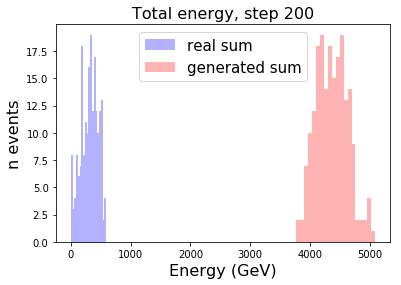

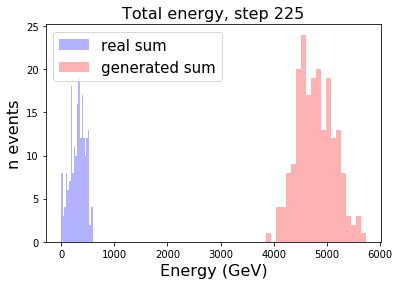

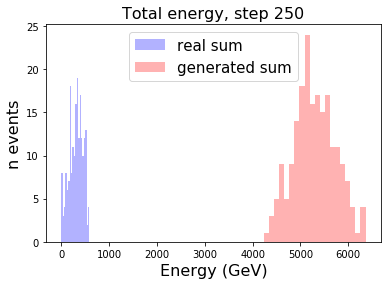

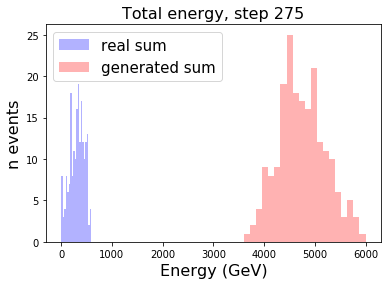

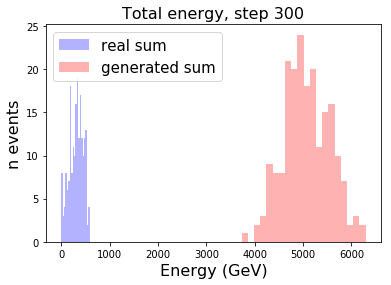

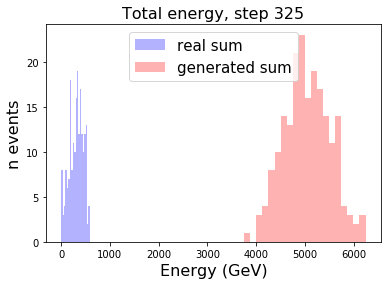

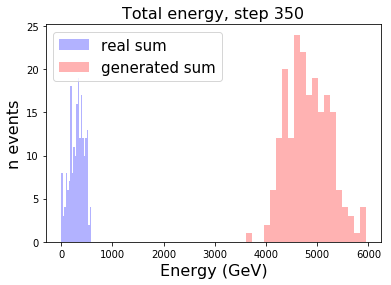

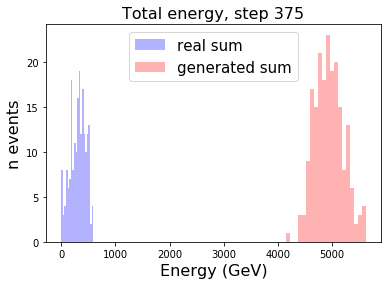

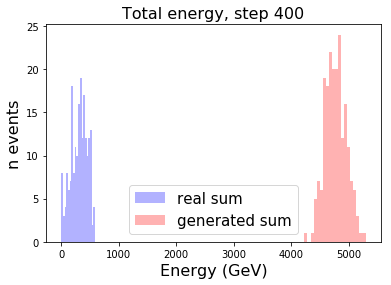

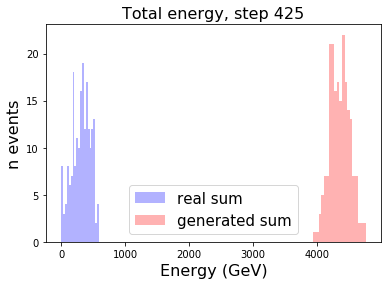

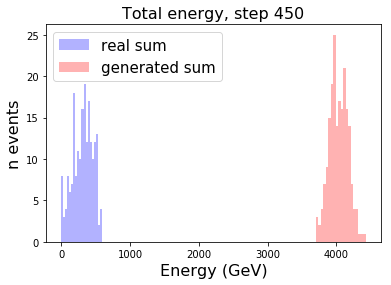

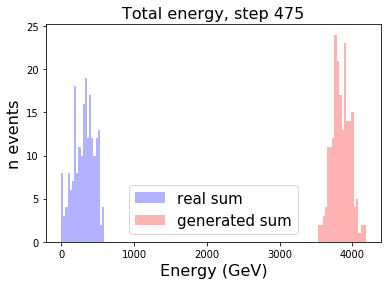

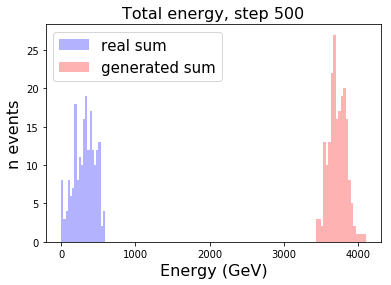

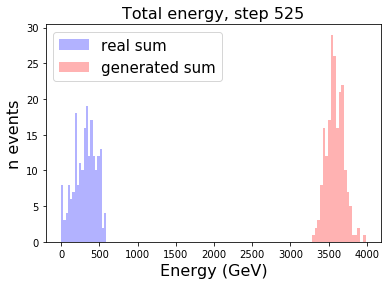

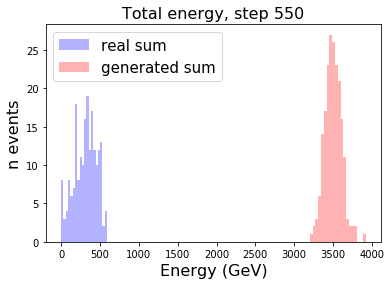

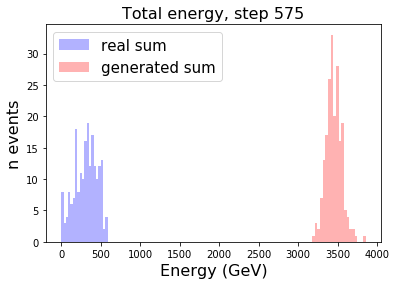

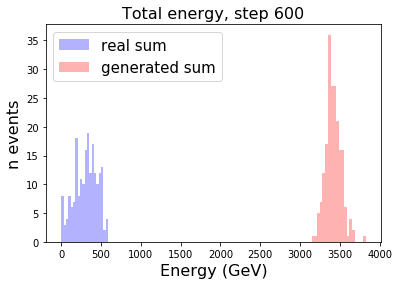

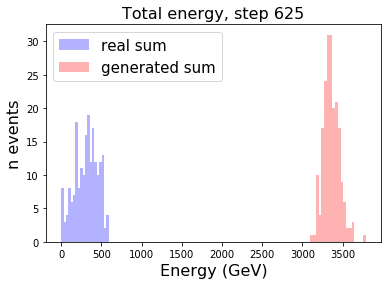

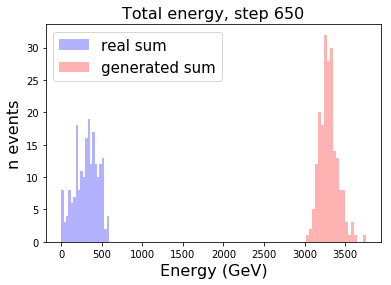

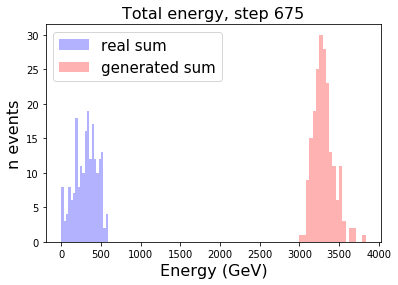

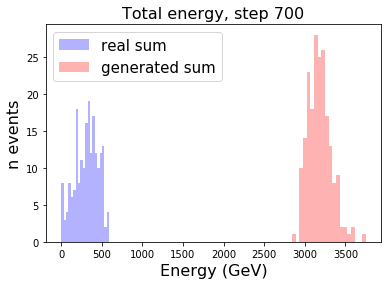

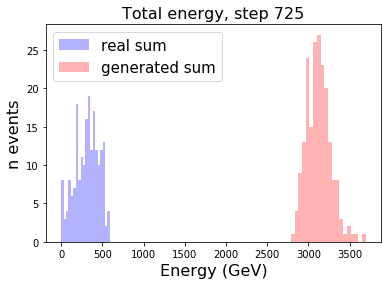

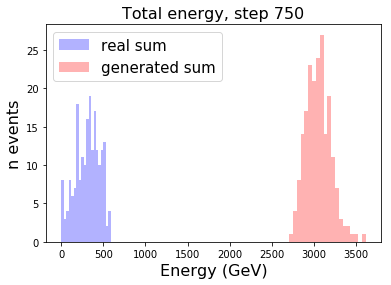

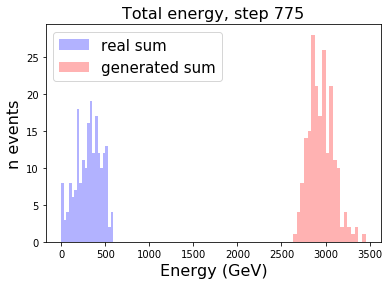

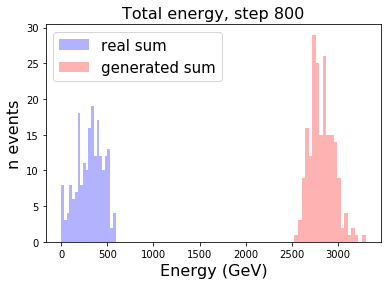

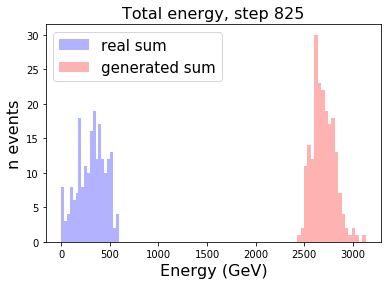

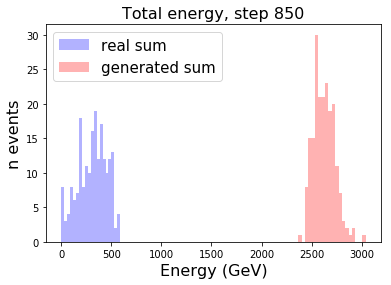

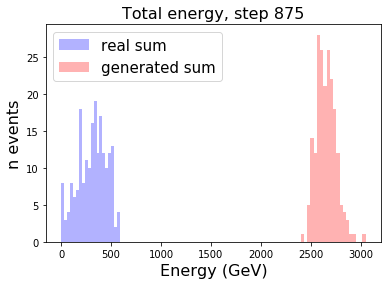

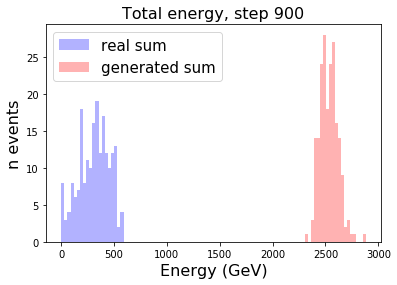

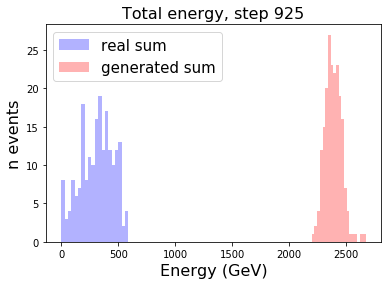

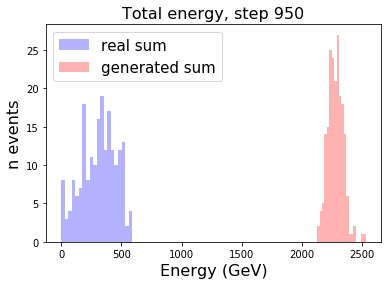

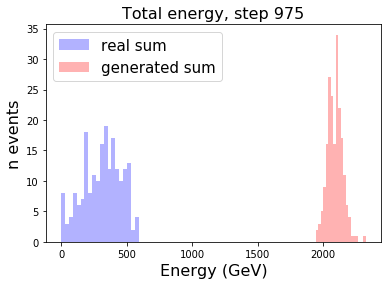

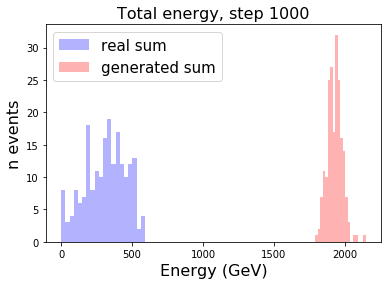

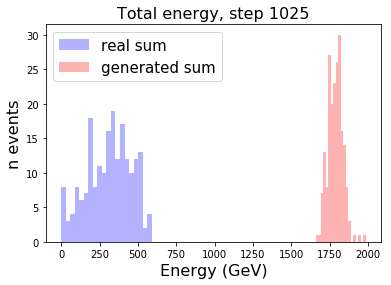

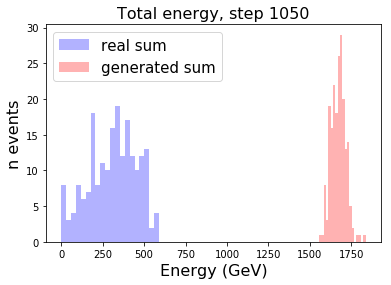

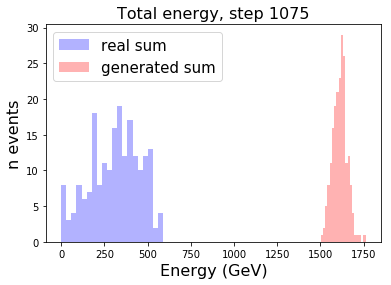

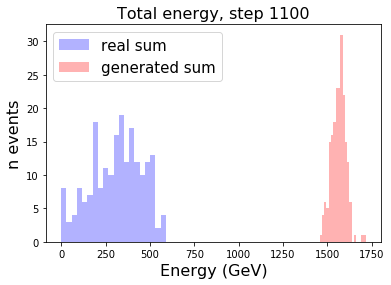

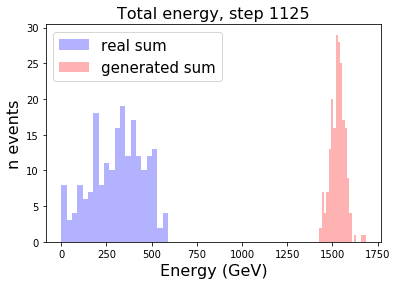

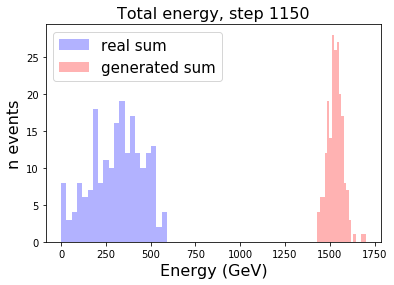

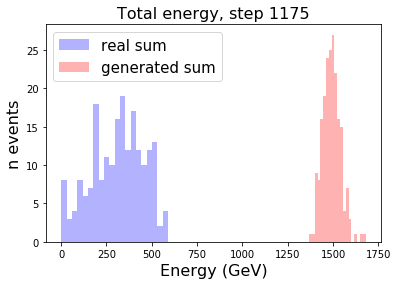

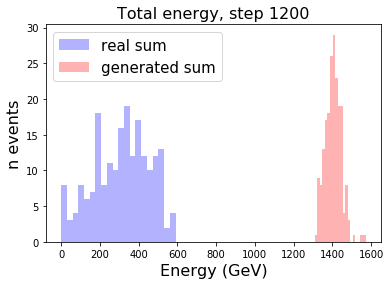

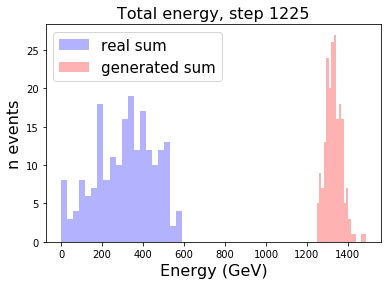

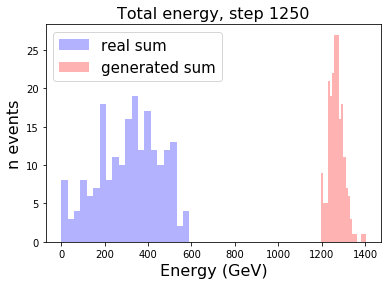

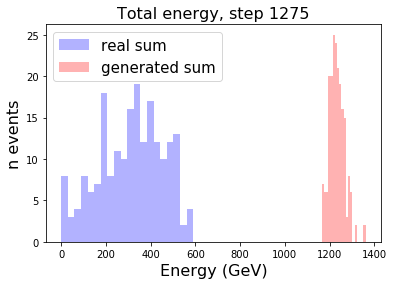

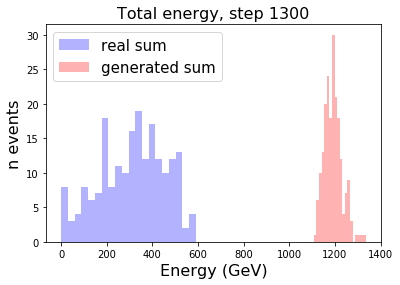

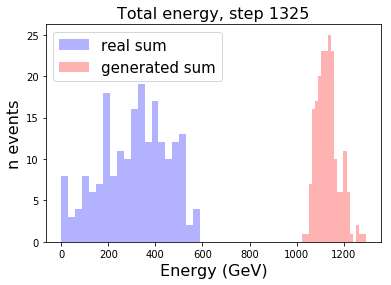

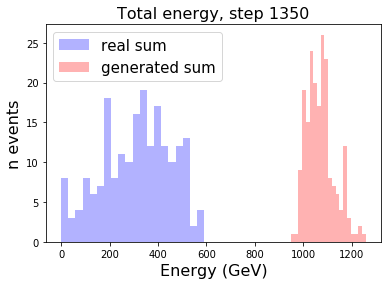

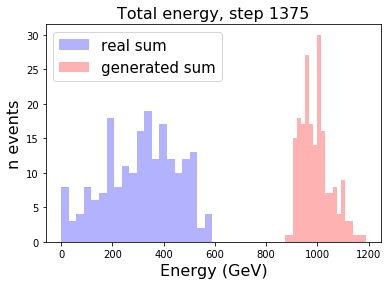

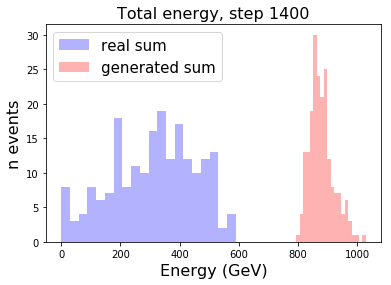

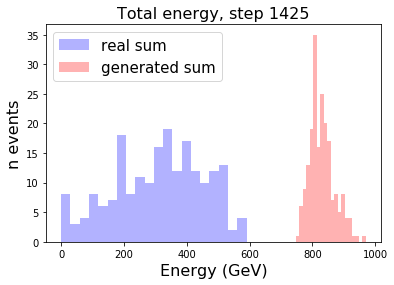

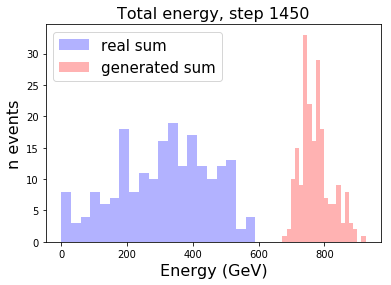

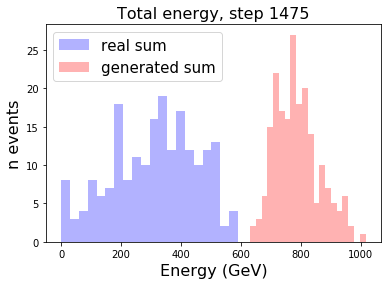

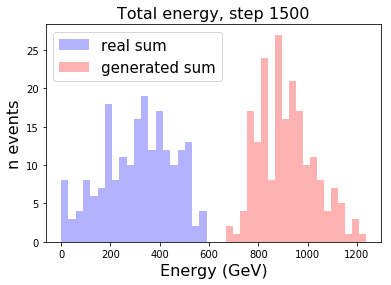

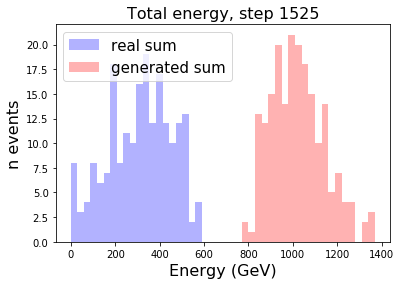

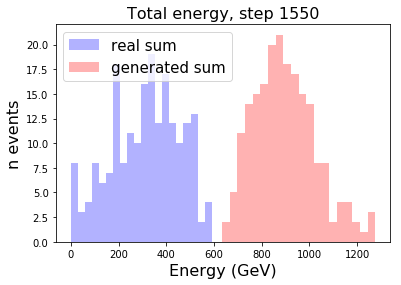

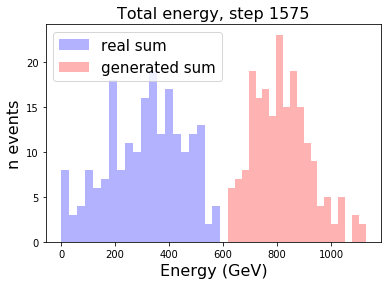

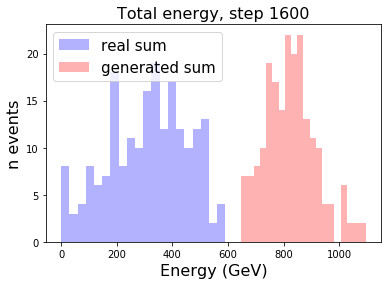

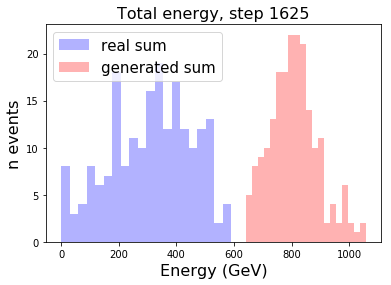

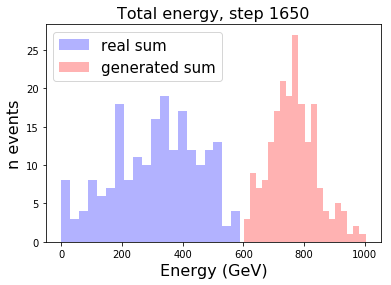

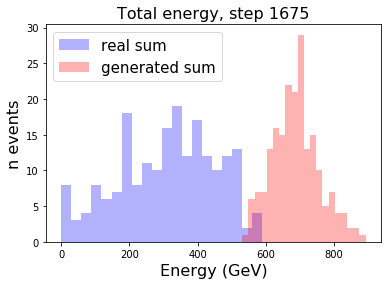

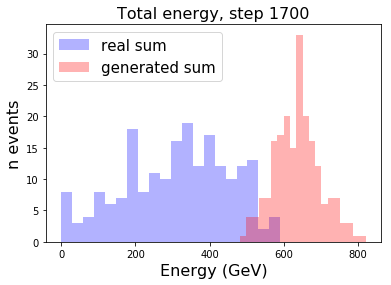

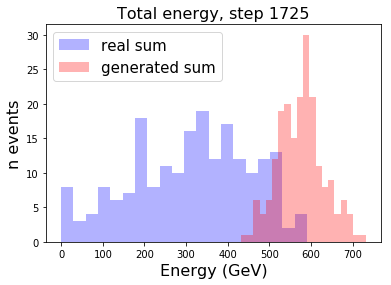

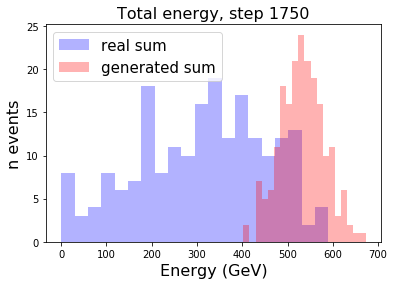

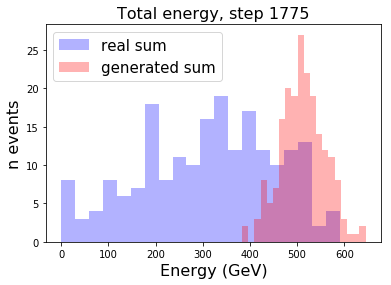

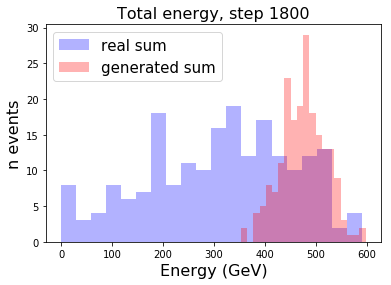

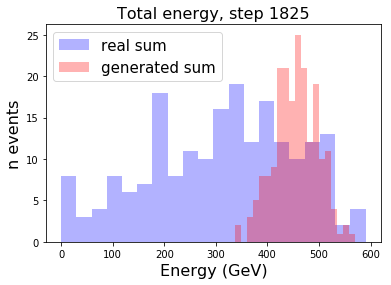

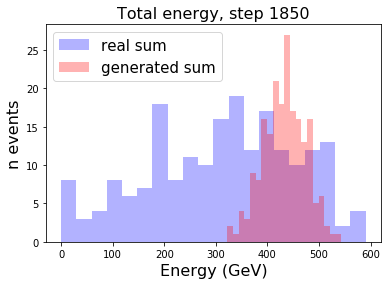

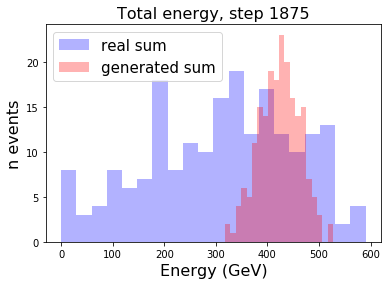

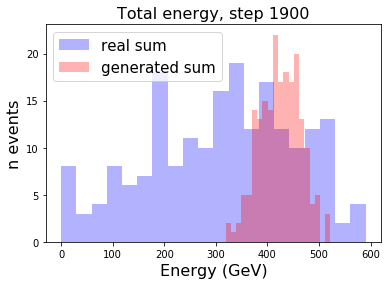

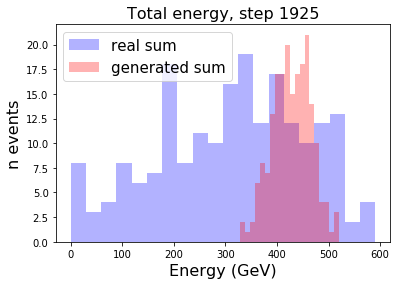

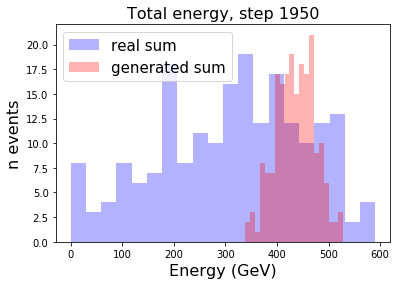

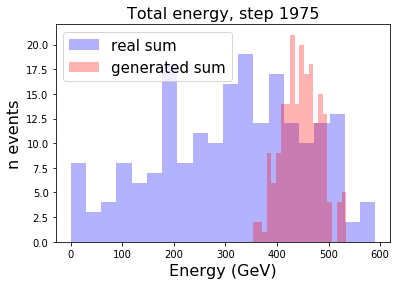

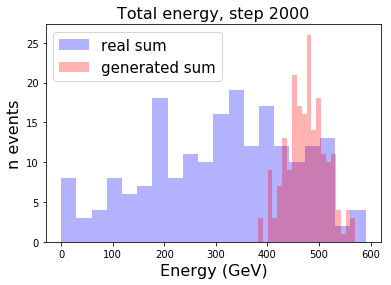

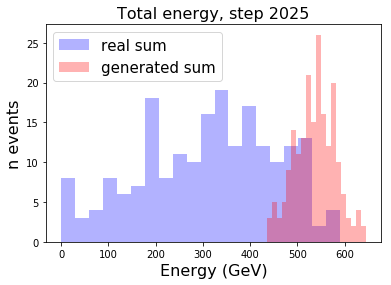

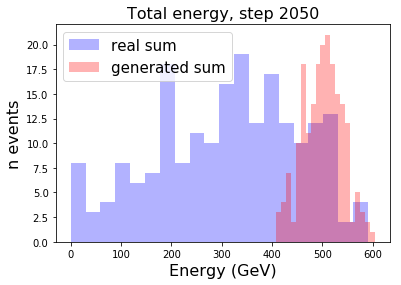

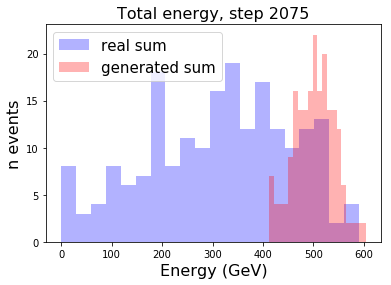

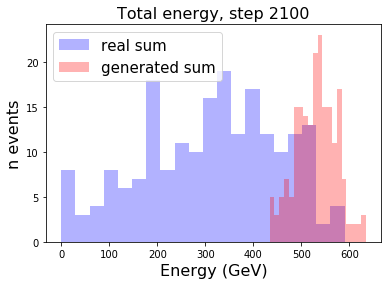

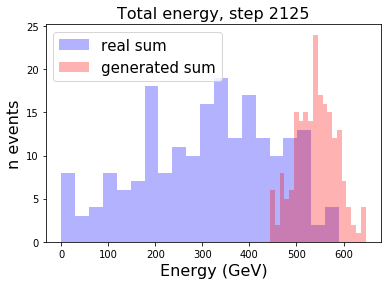

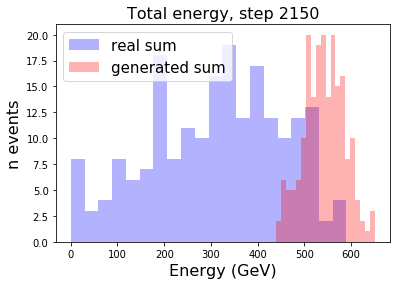

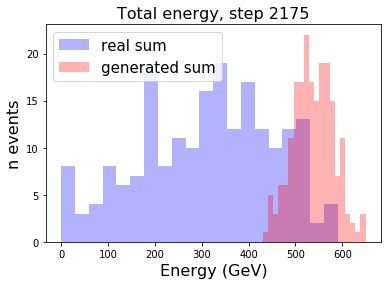

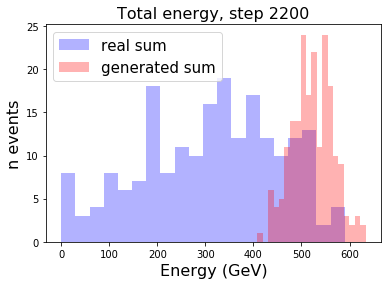

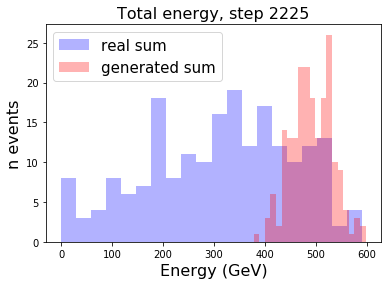

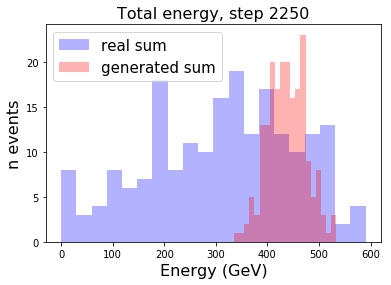

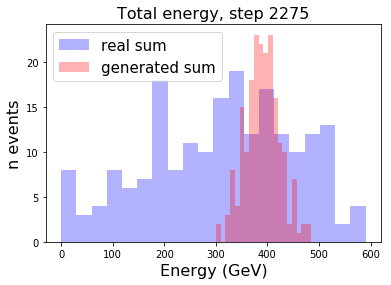

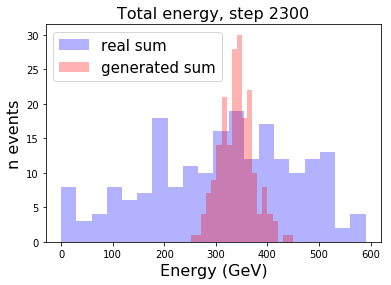

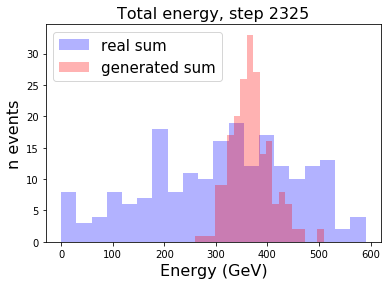

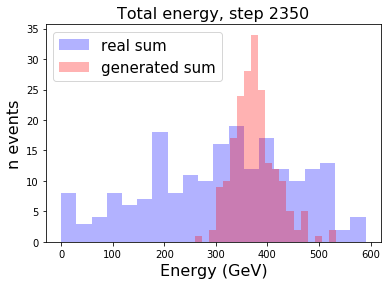

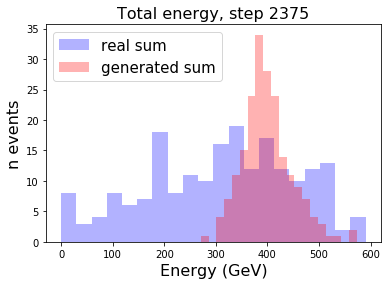

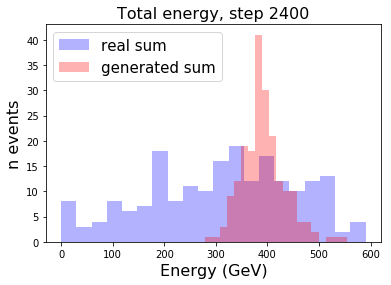

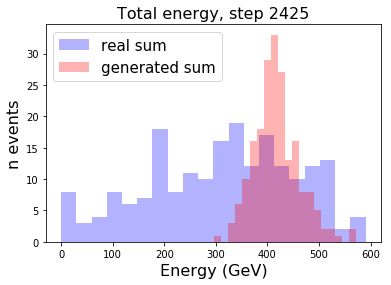

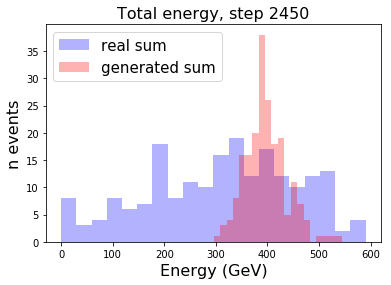

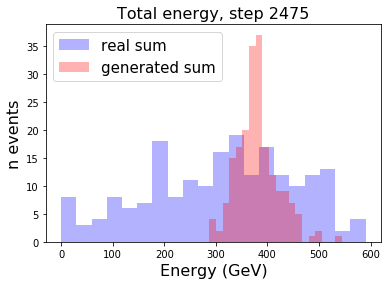

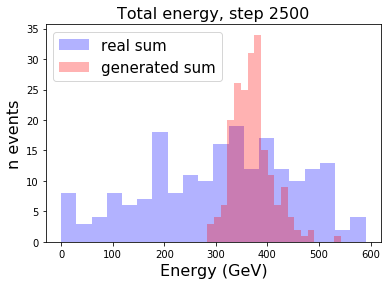

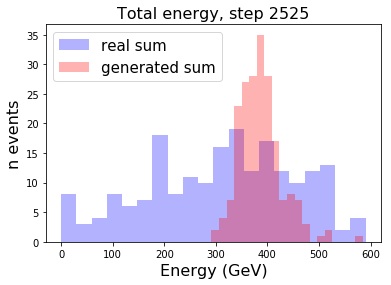

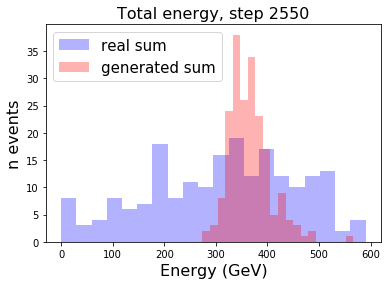

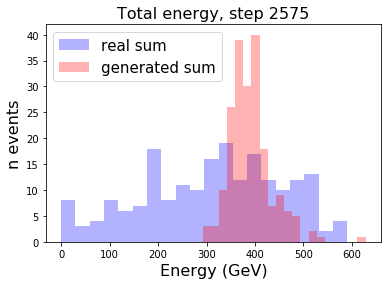

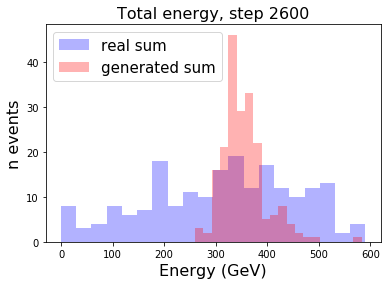

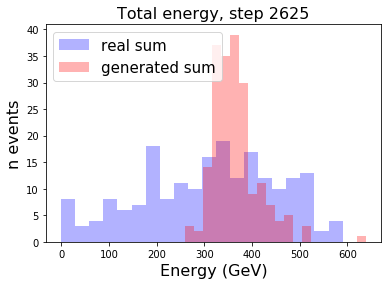

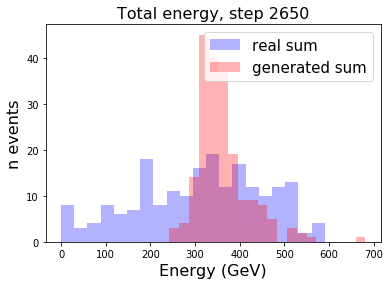

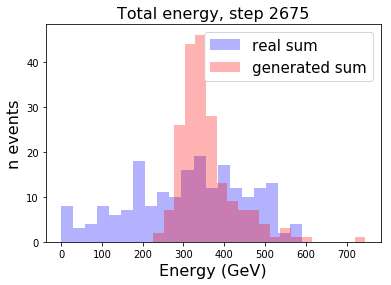

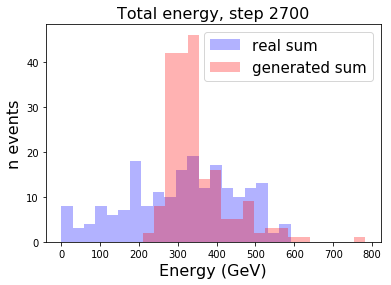

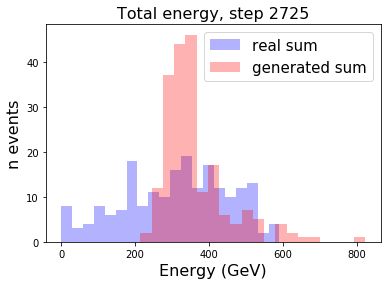

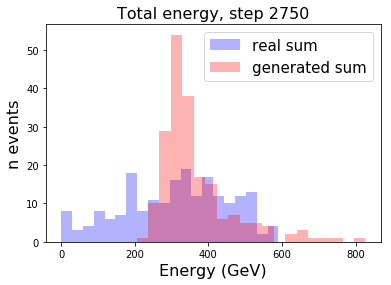

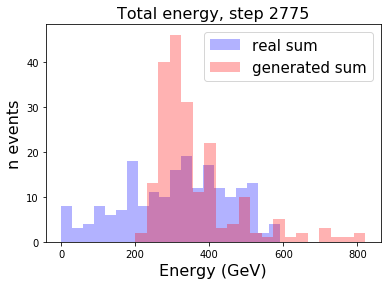

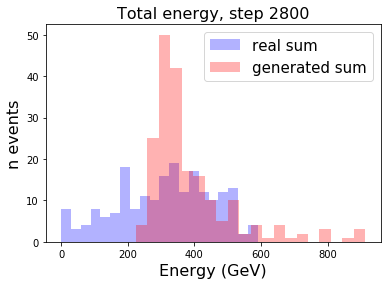

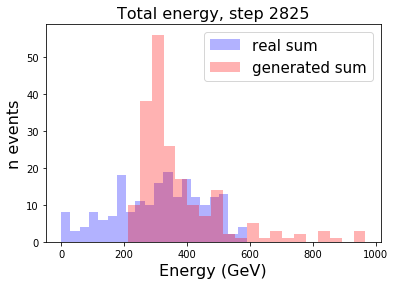

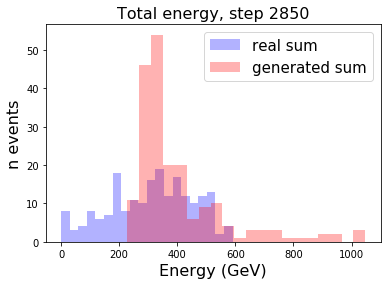

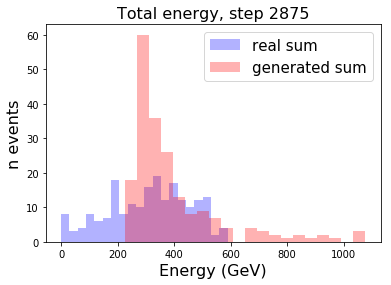

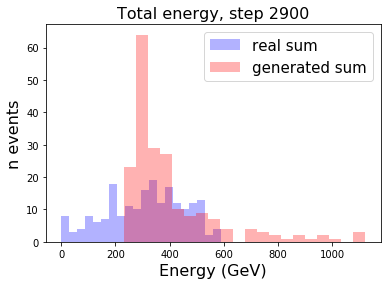

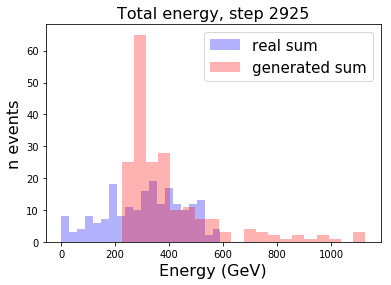

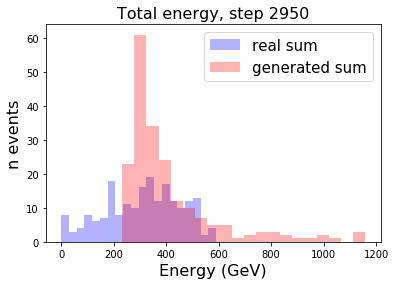

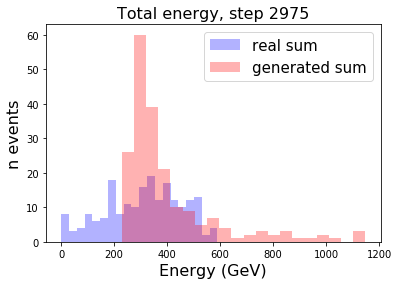

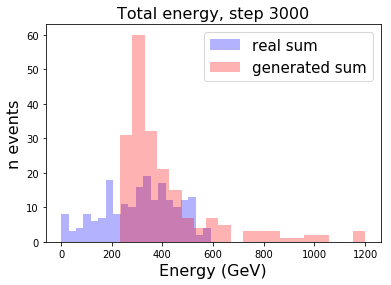

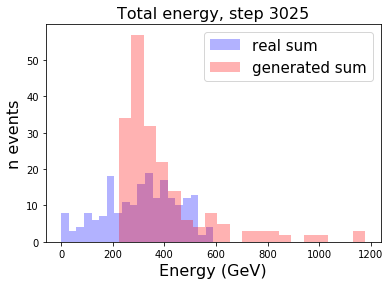

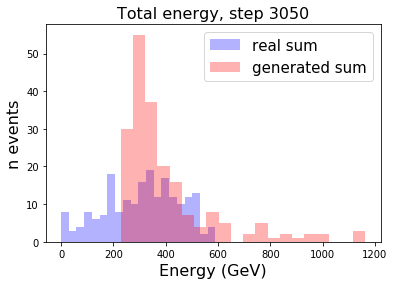

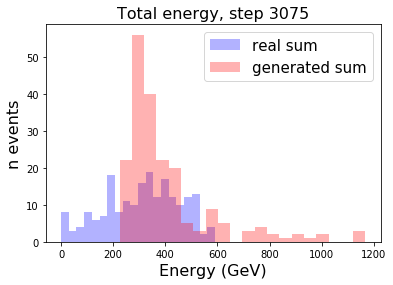

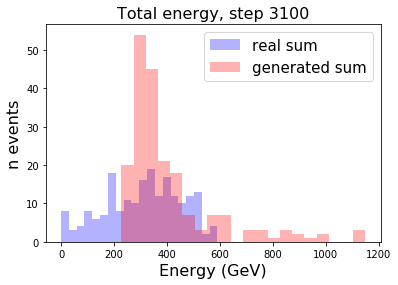

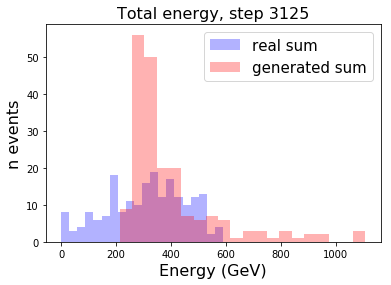

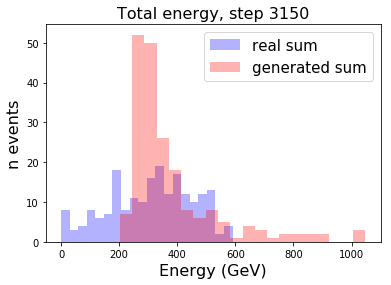

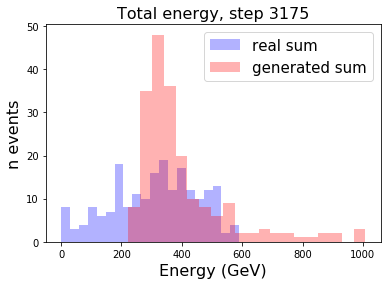

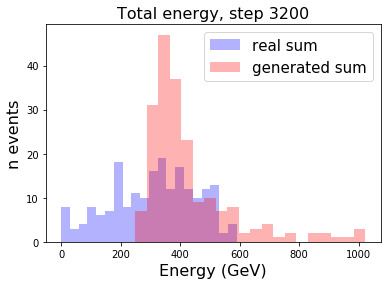

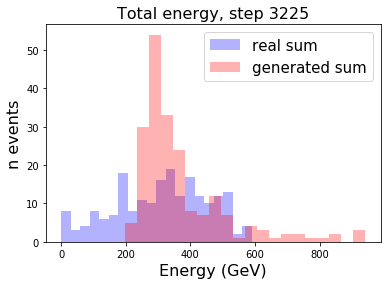

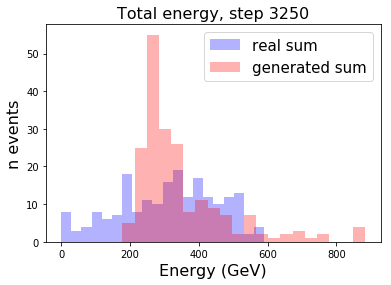

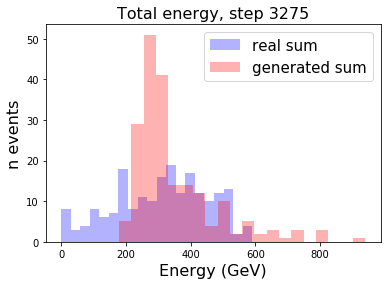

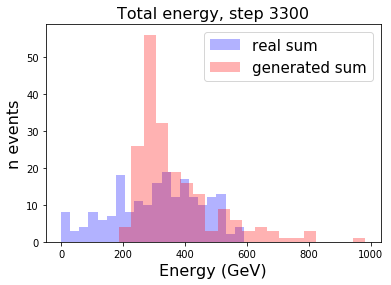

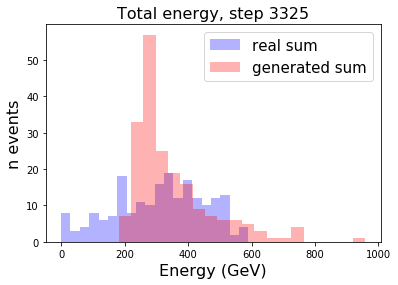

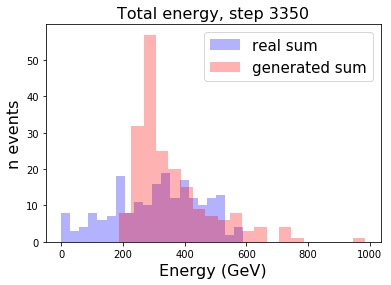

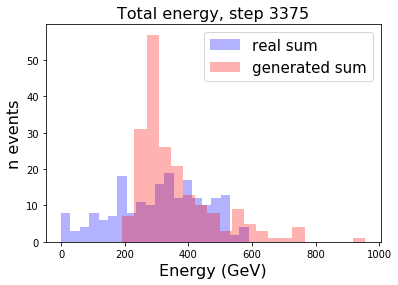

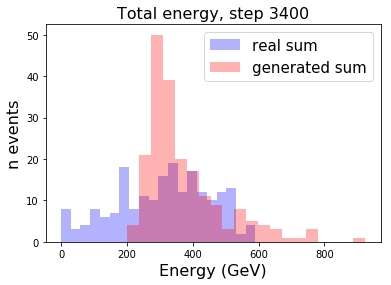

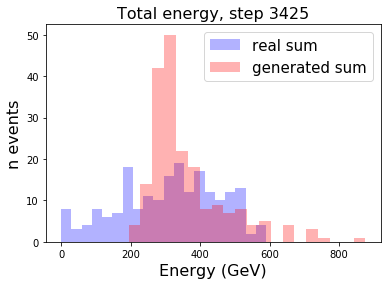

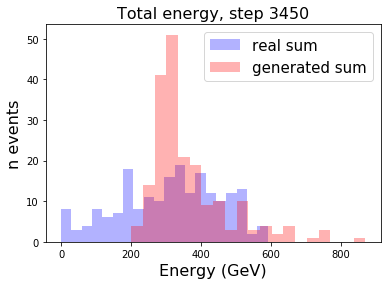

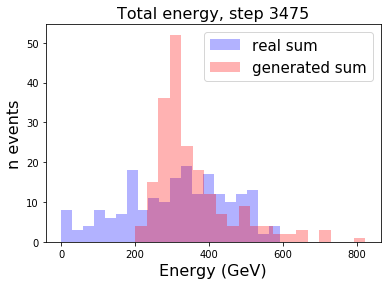

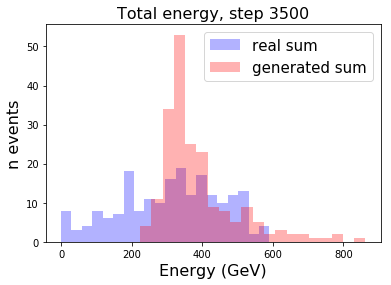

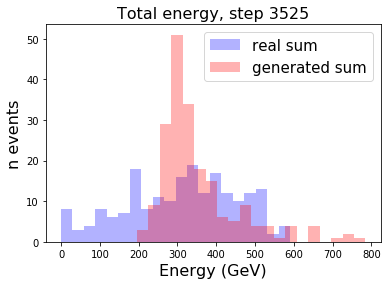

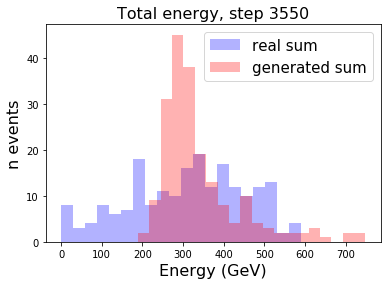

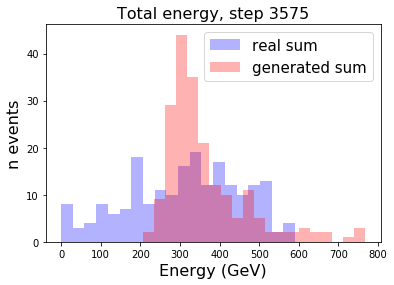

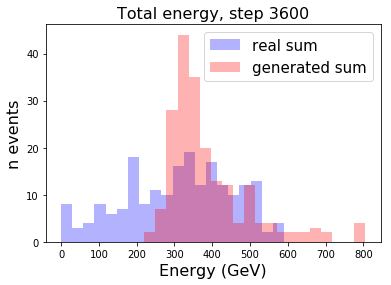

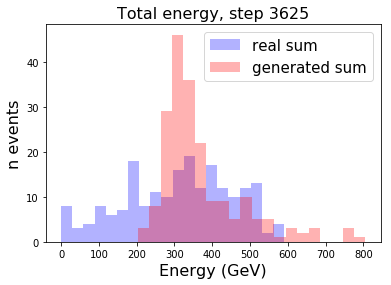

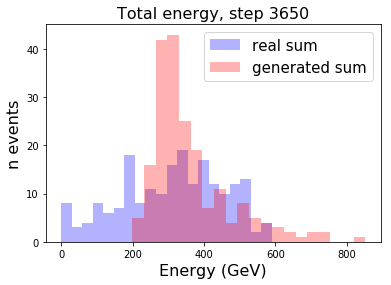

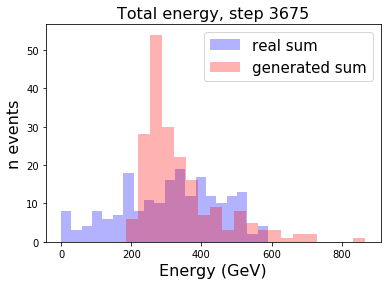

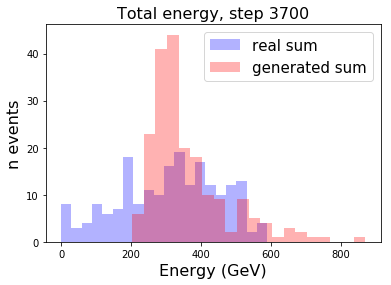

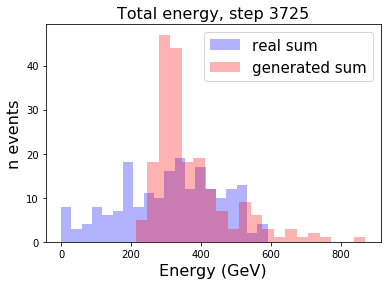

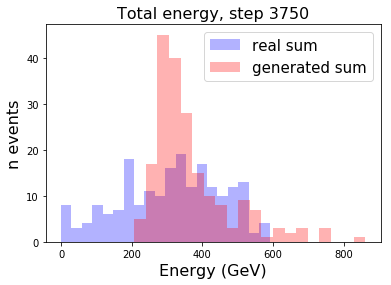

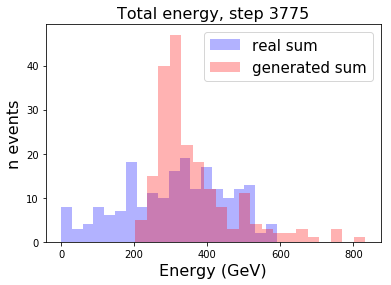

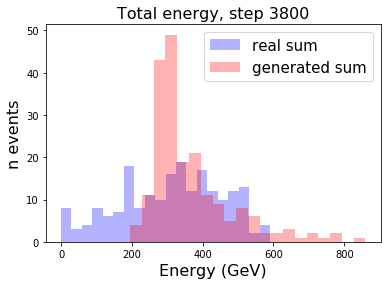

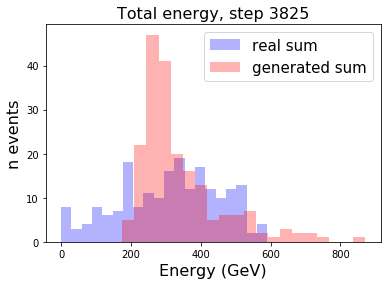

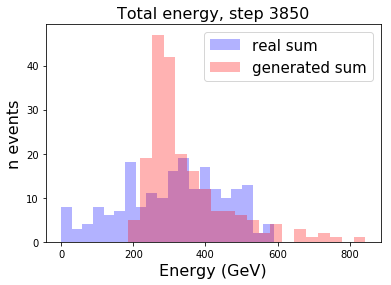

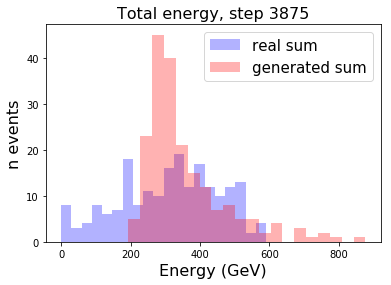

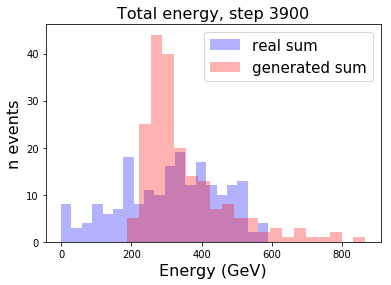

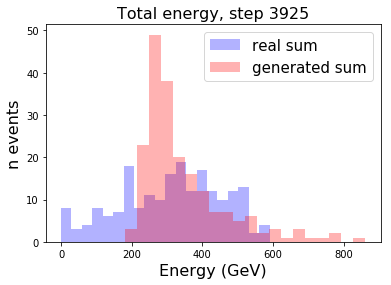

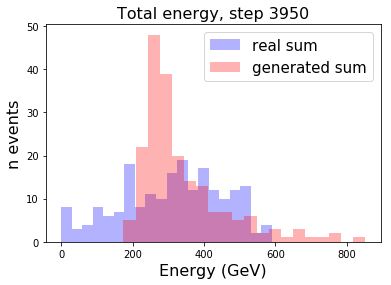

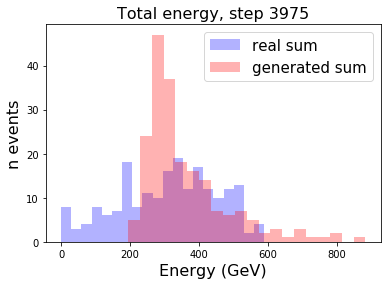

In [6]:
plotSumHist(inp_sum, all_g_weight1, gen_model1)

## Model without energy constraint and without regression

Using TensorFlow backend.
/mnt/home/vbarinpa/tf9/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


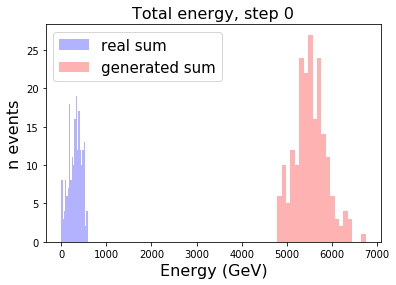

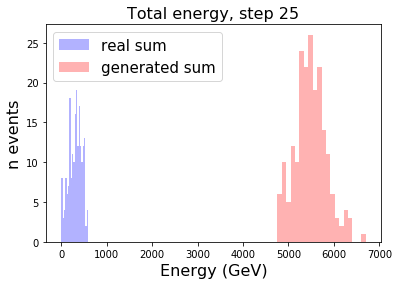

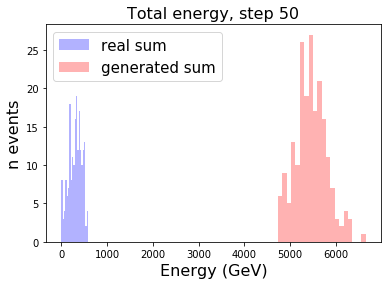

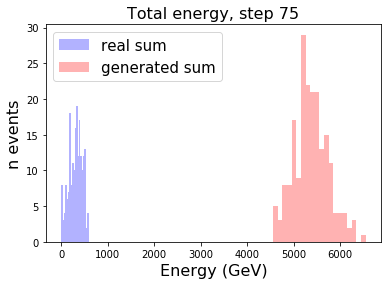

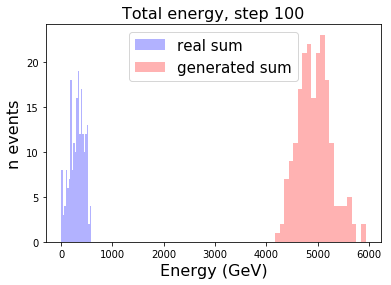

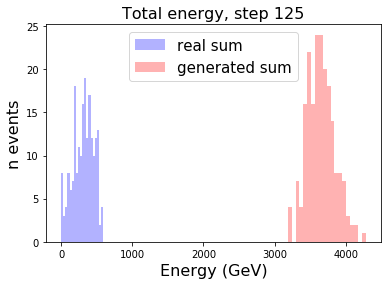

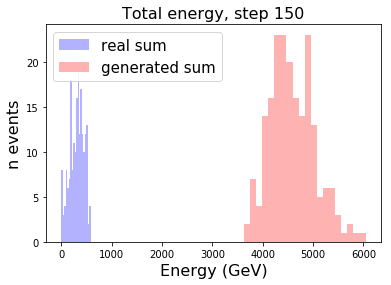

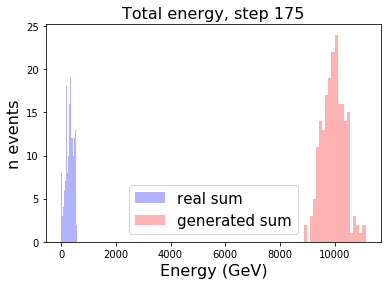

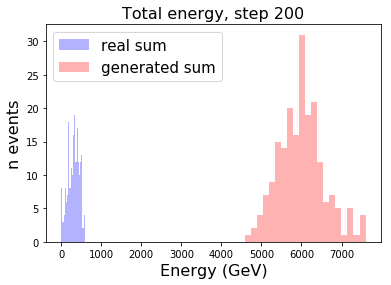

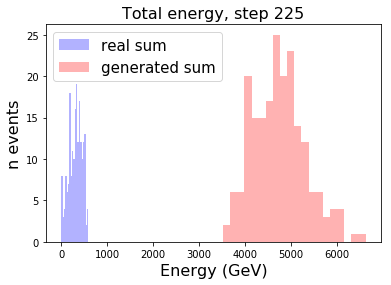

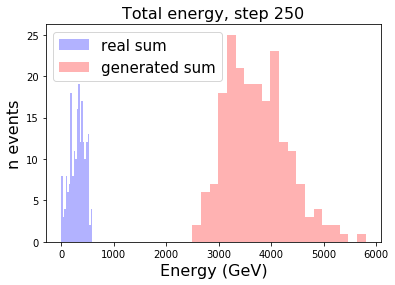

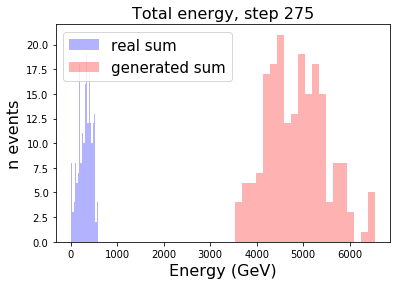

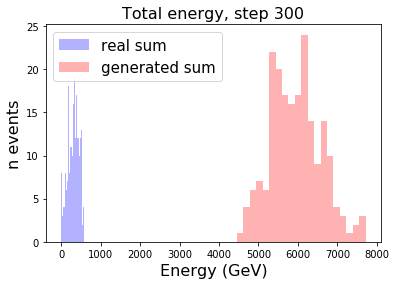

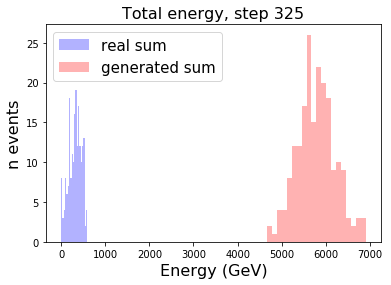

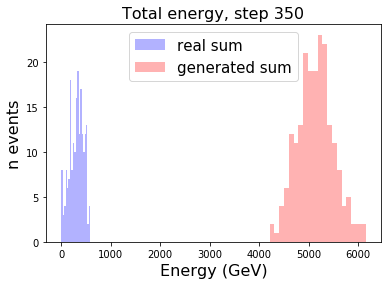

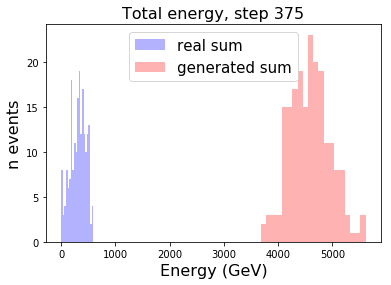

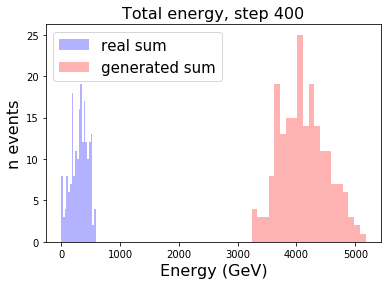

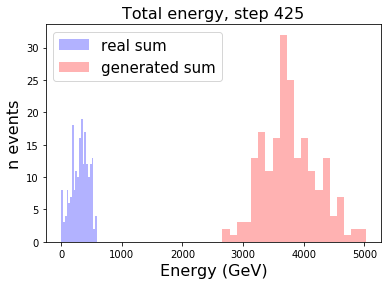

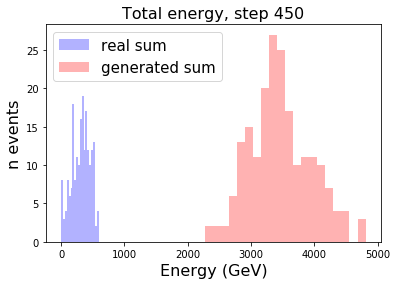

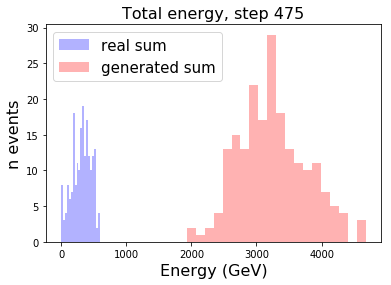

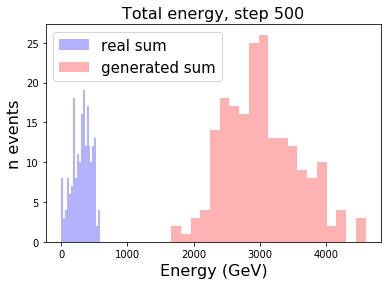

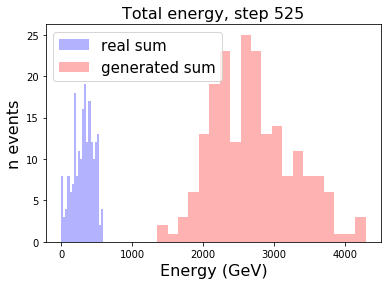

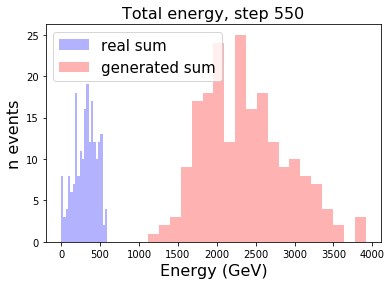

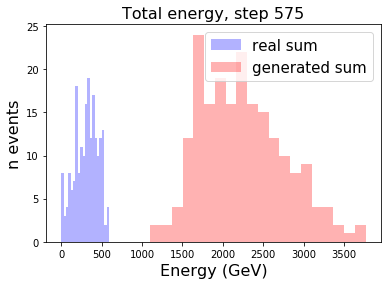

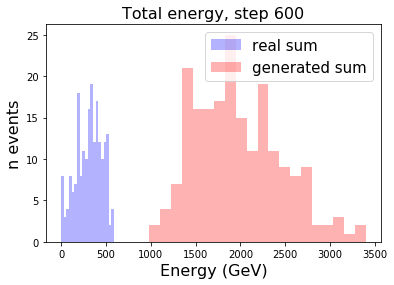

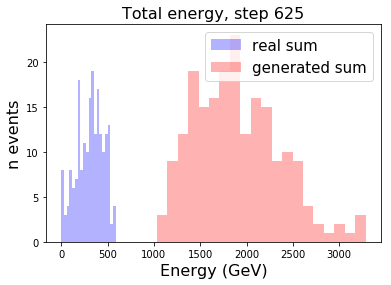

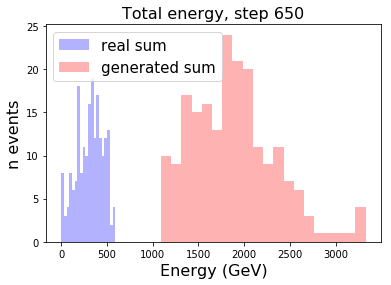

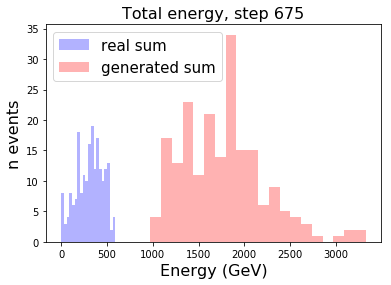

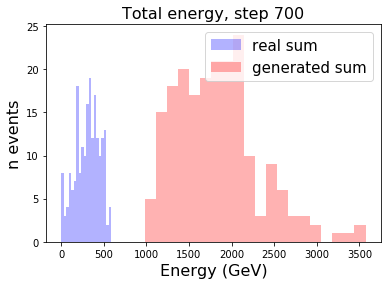

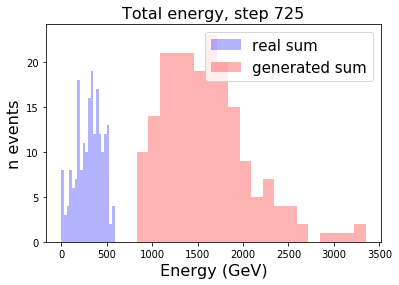

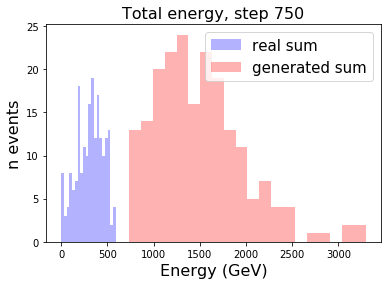

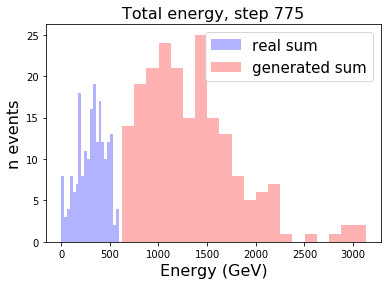

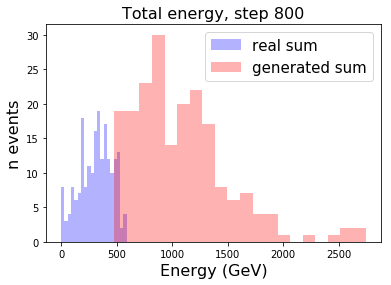

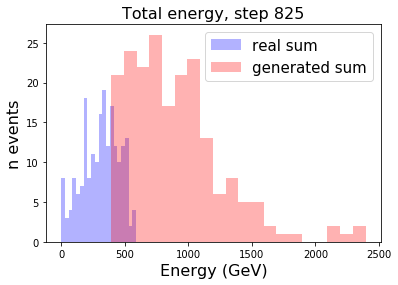

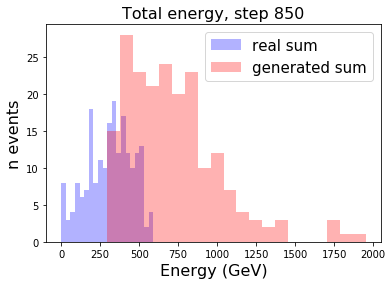

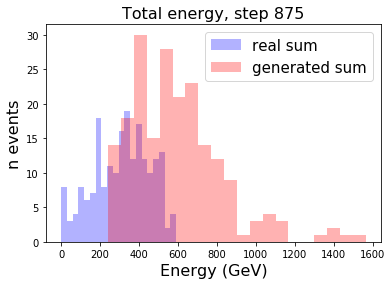

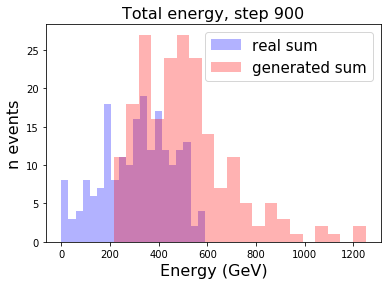

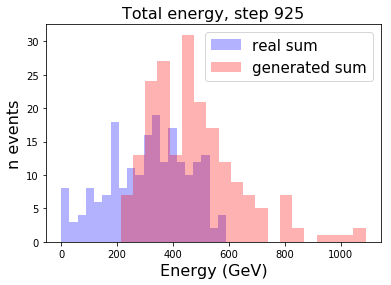

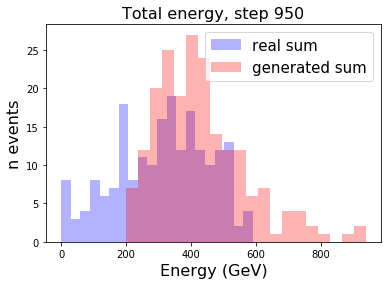

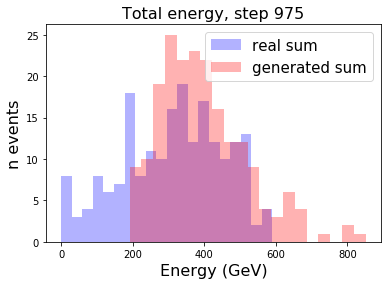

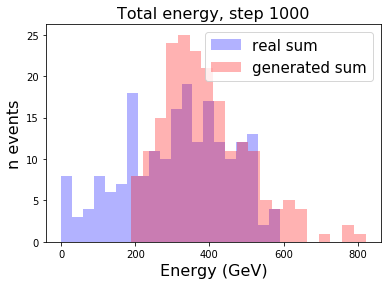

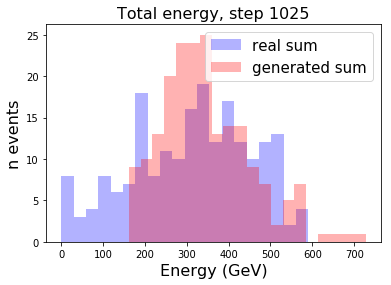

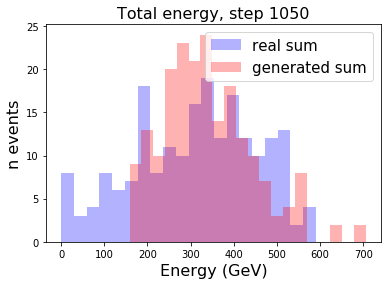

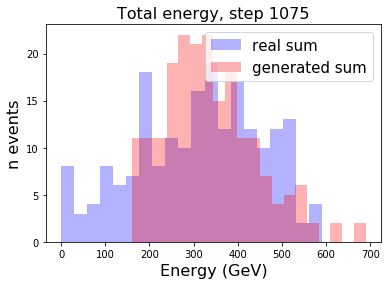

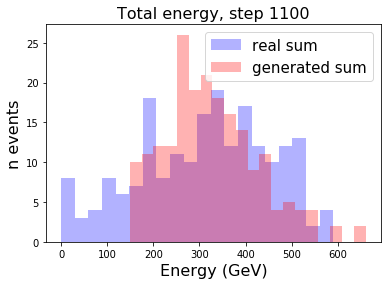

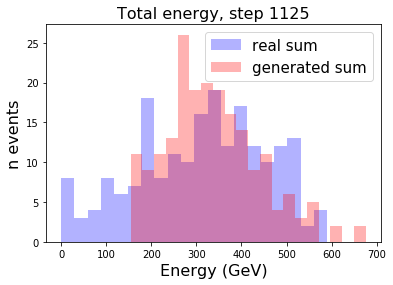

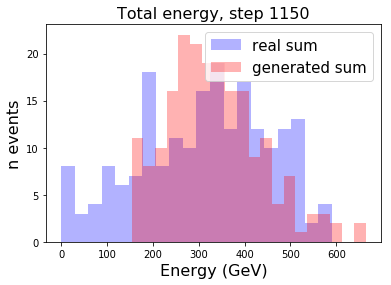

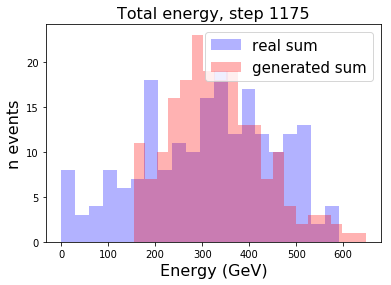

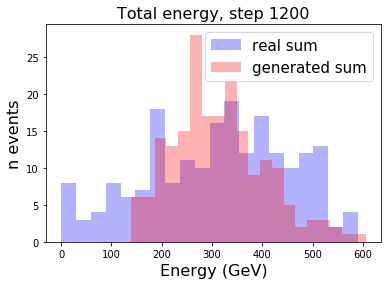

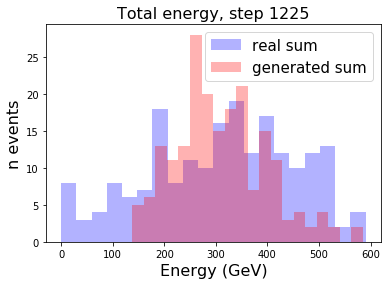

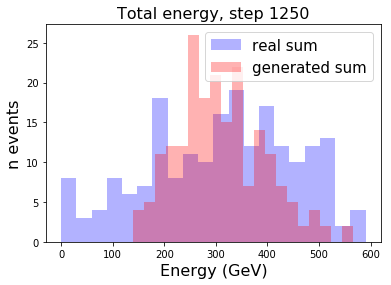

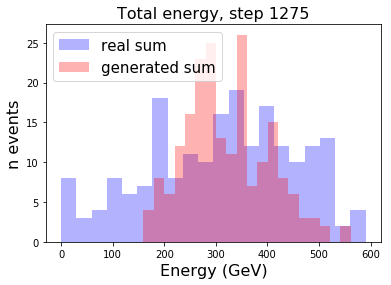

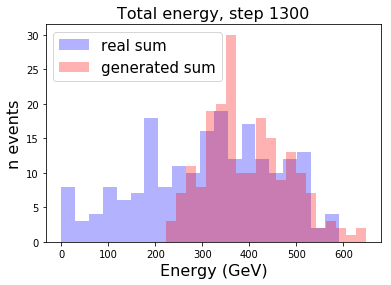

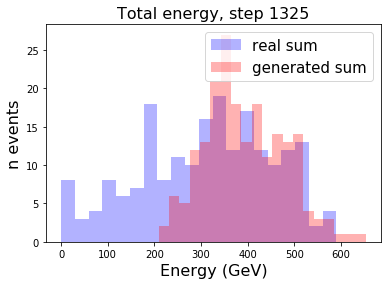

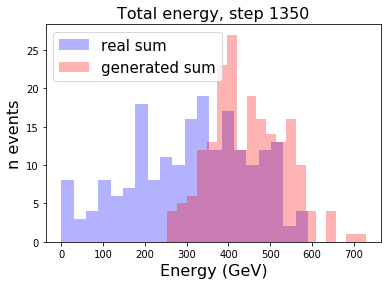

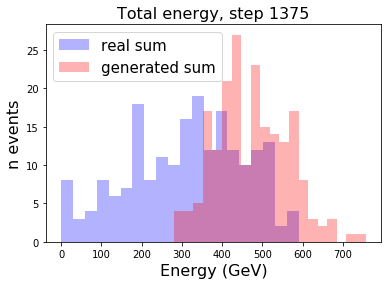

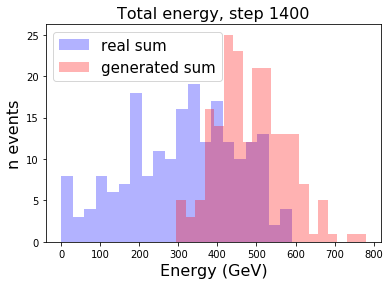

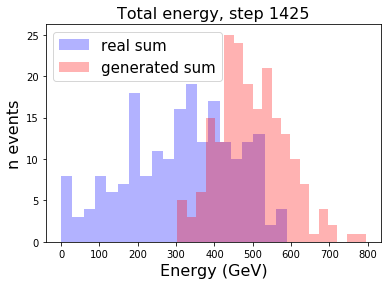

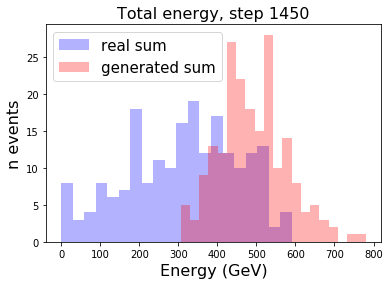

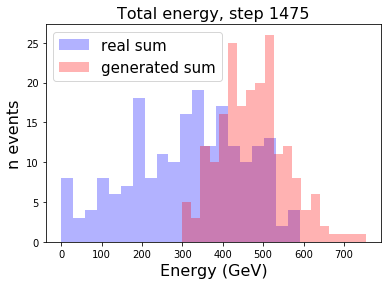

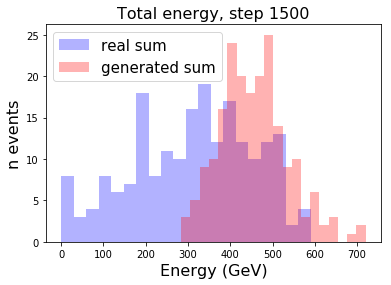

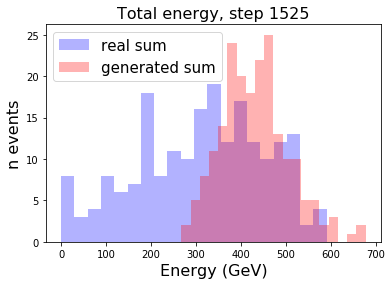

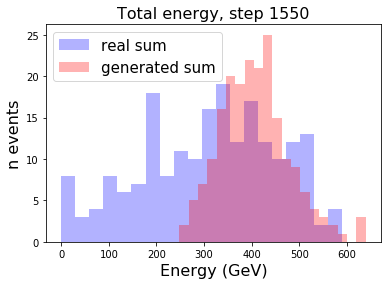

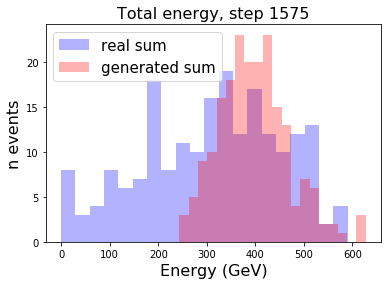

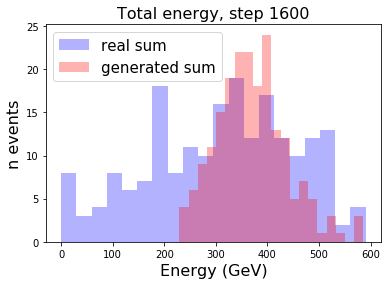

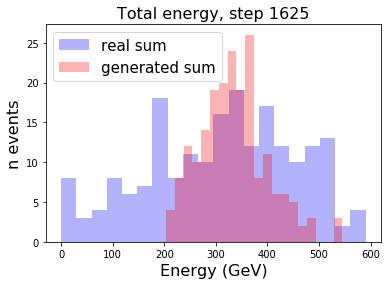

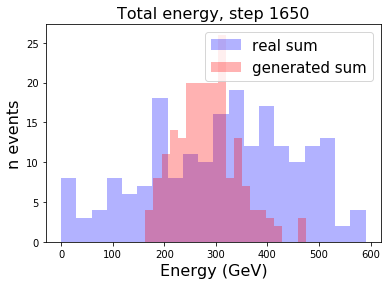

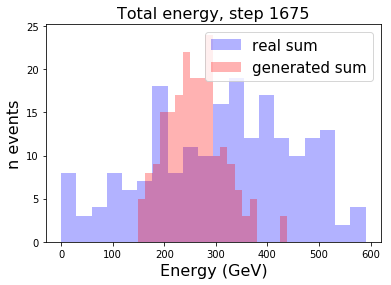

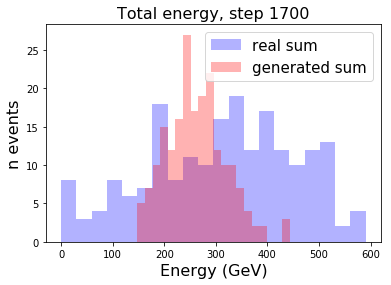

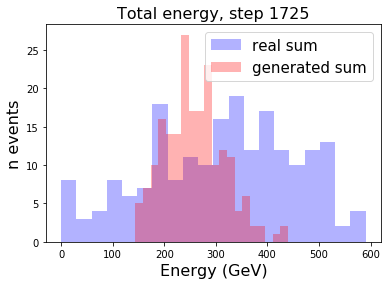

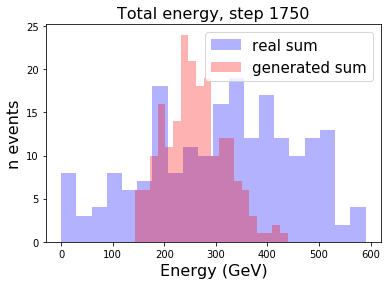

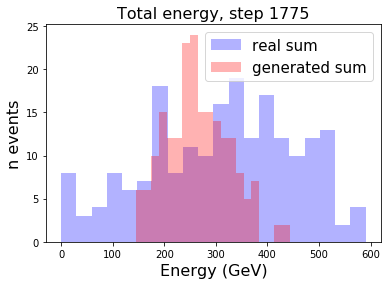

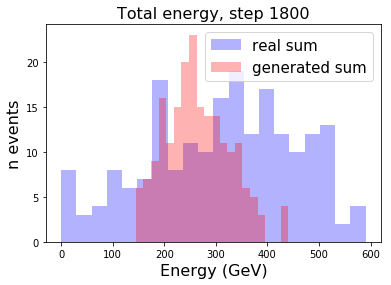

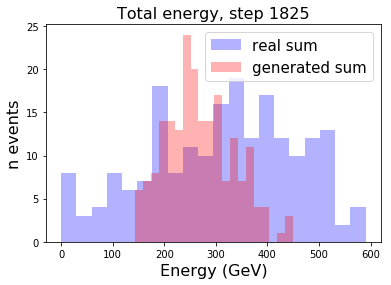

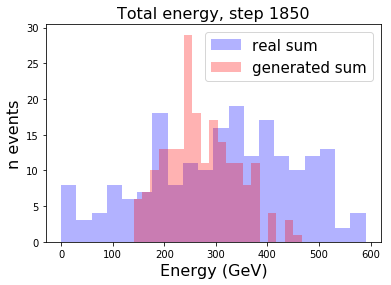

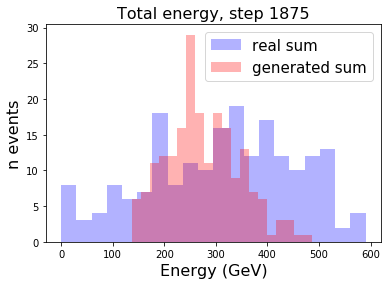

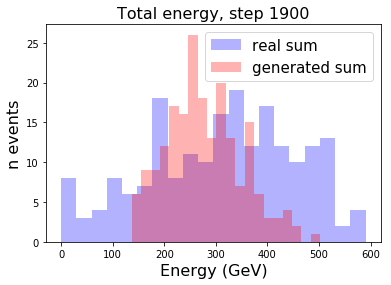

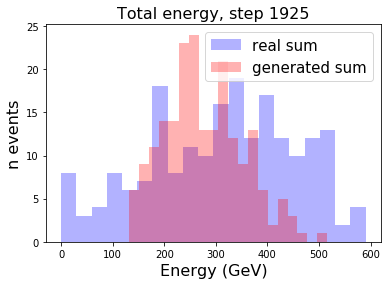

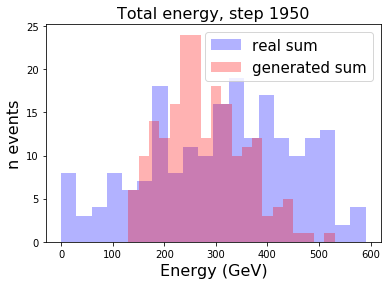

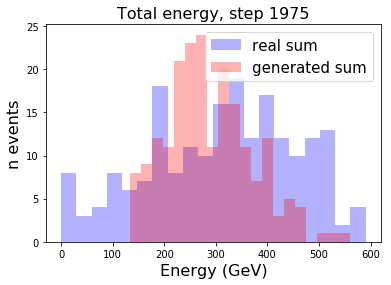

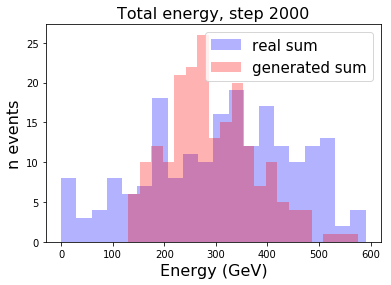

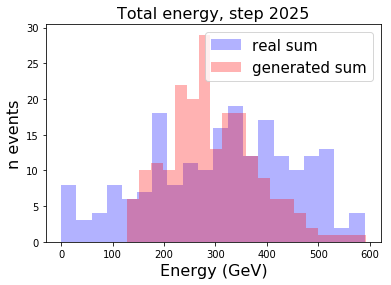

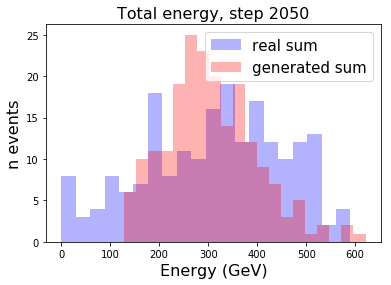

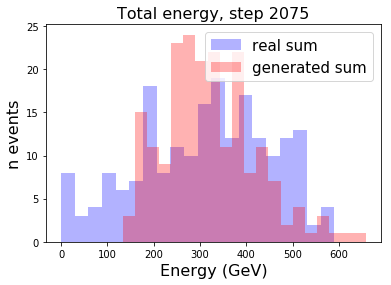

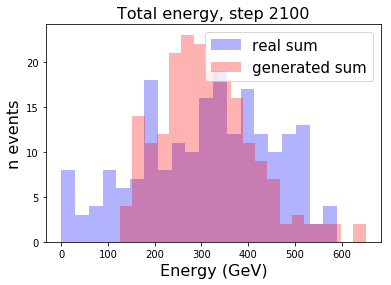

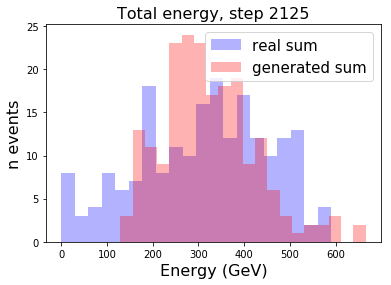

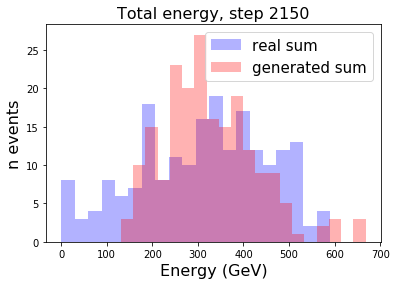

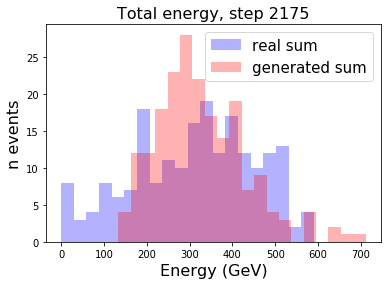

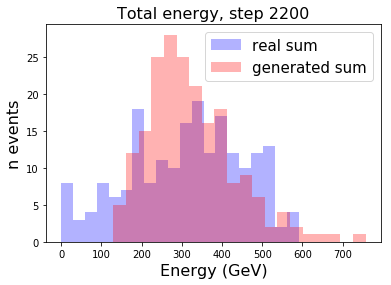

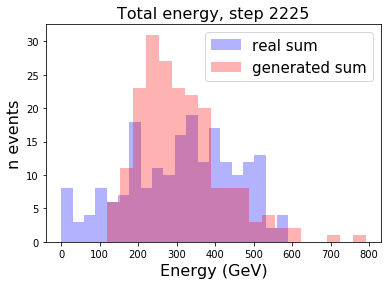

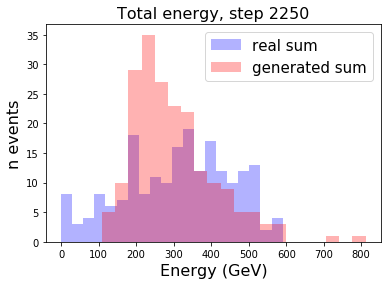

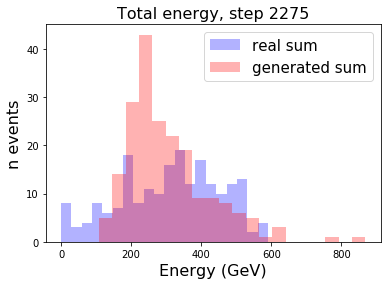

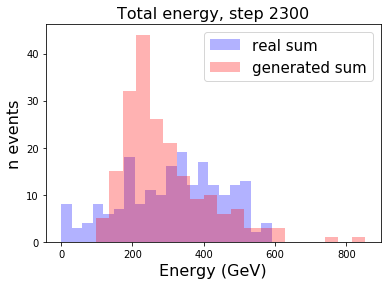

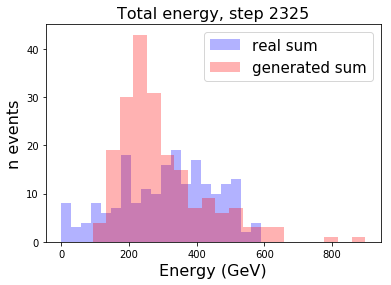

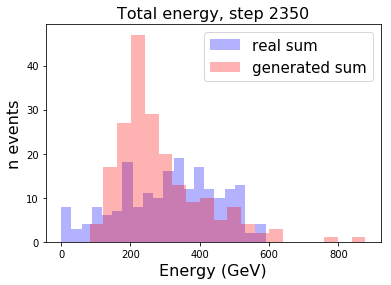

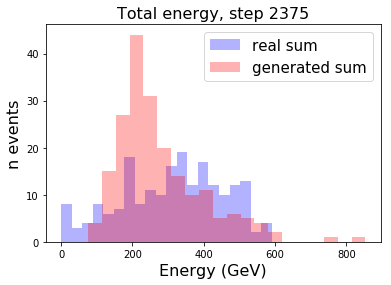

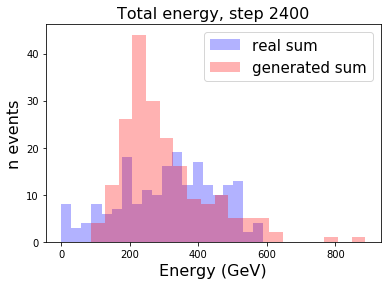

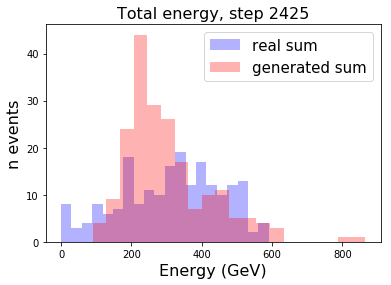

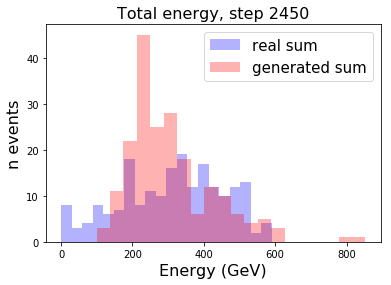

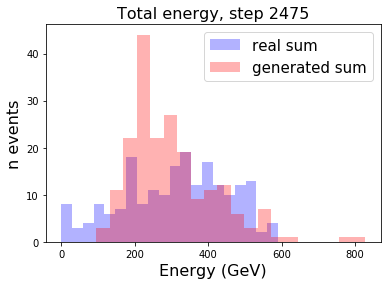

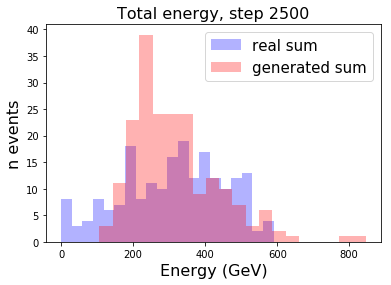

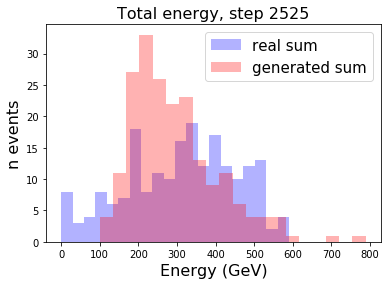

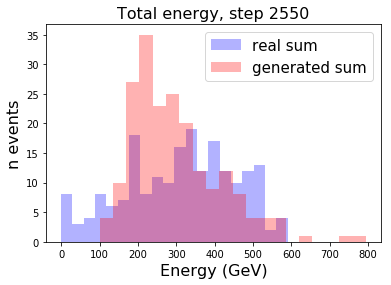

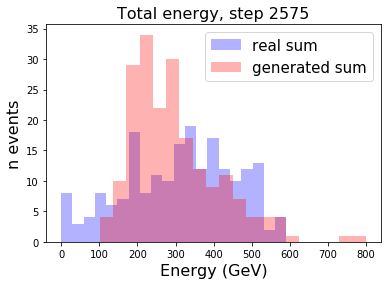

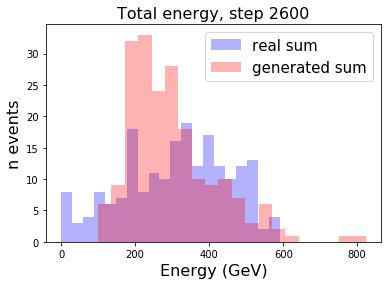

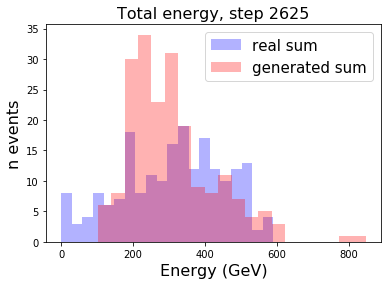

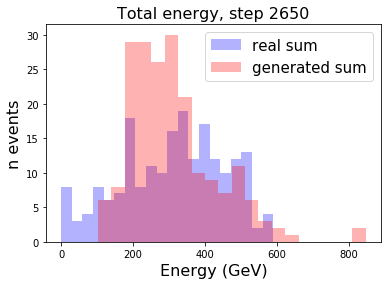

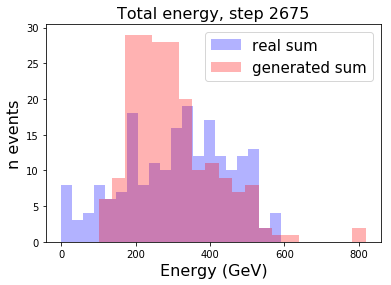

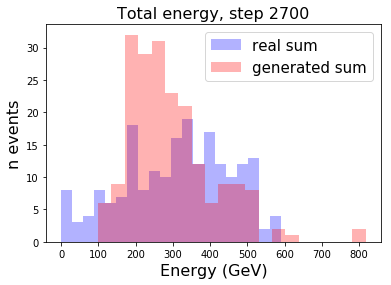

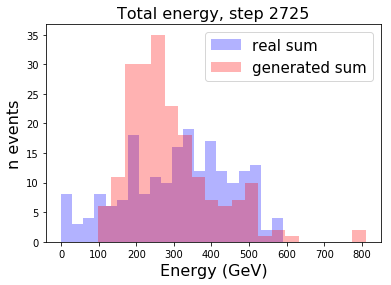

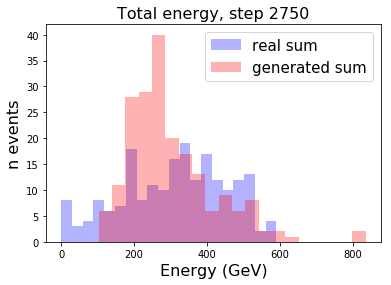

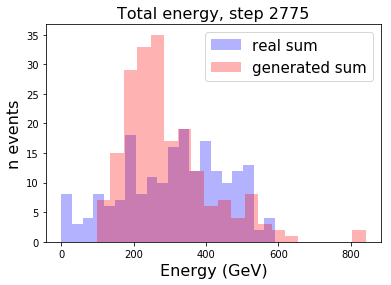

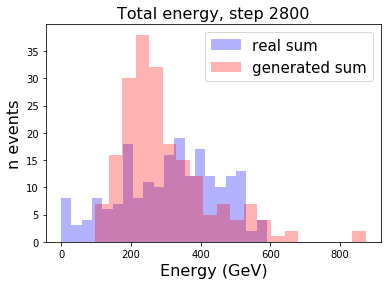

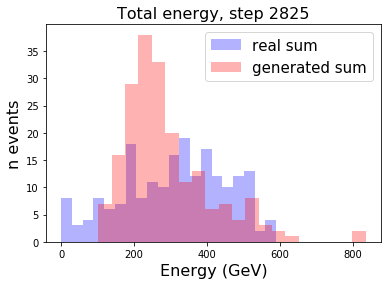

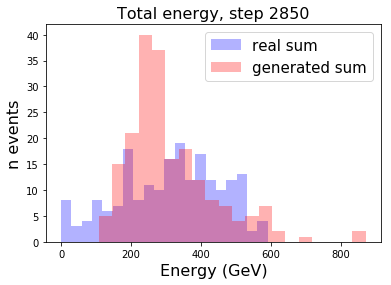

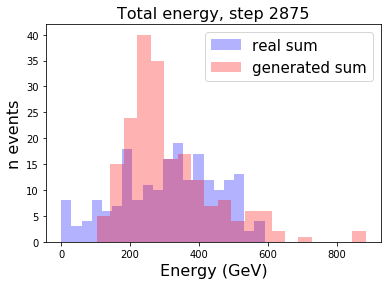

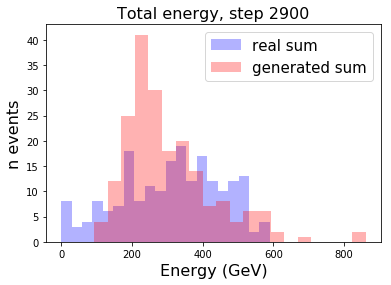

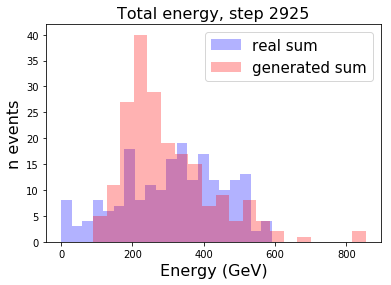

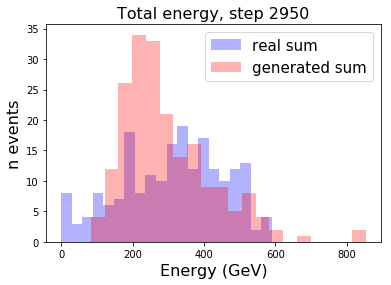

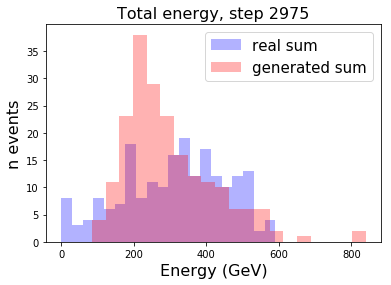

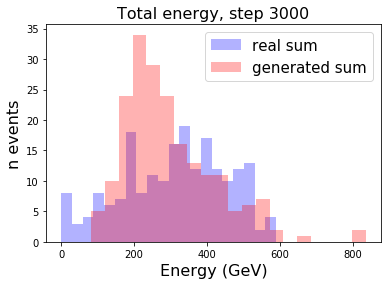

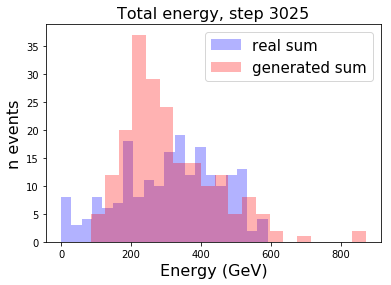

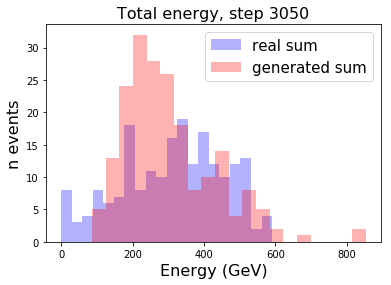

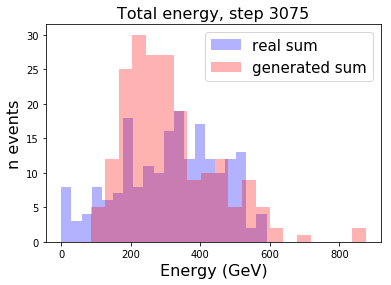

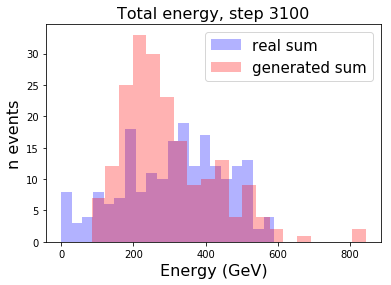

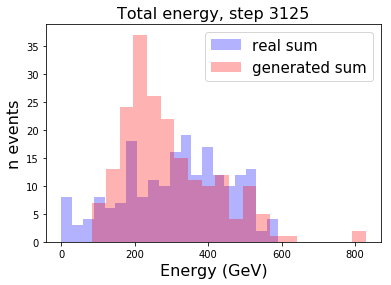

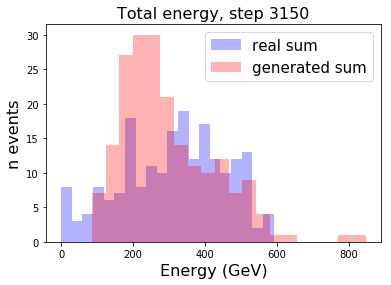

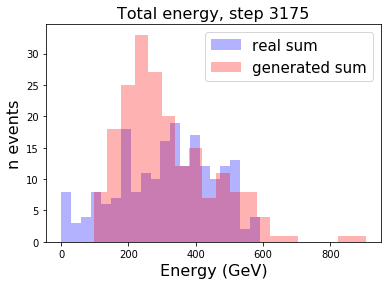

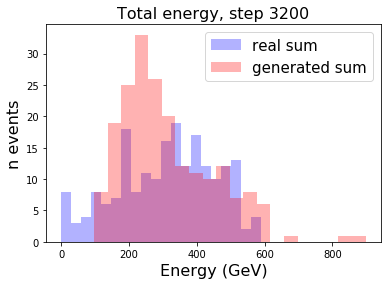

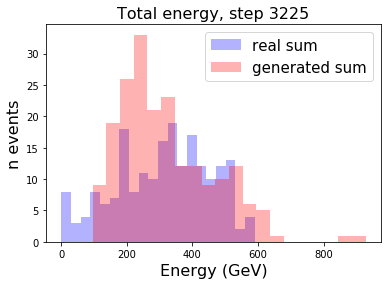

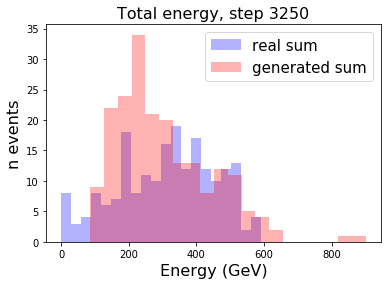

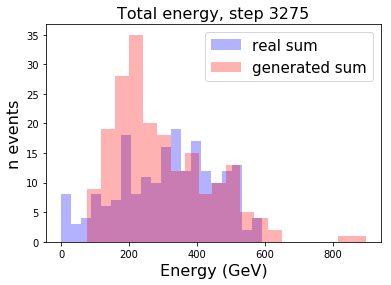

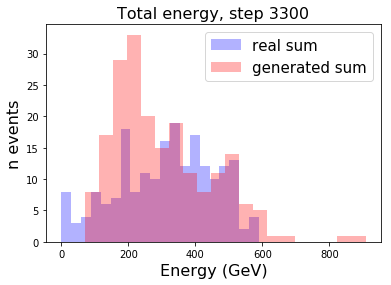

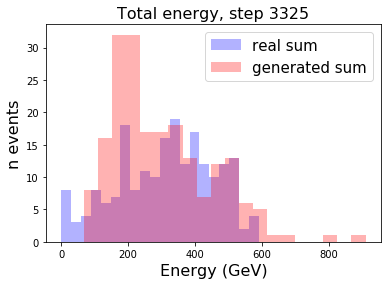

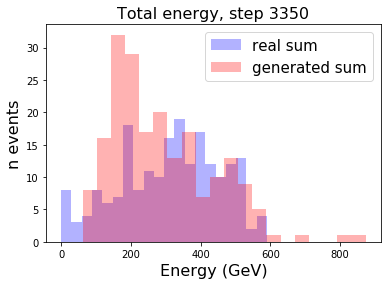

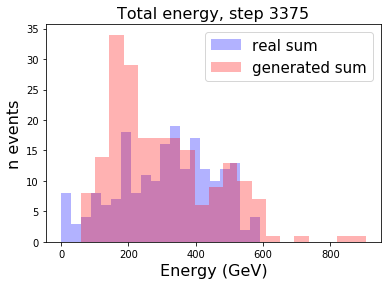

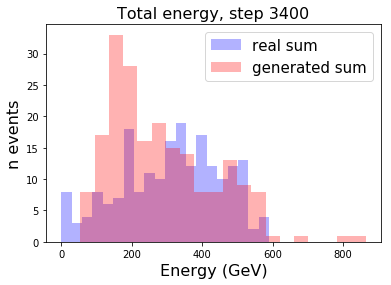

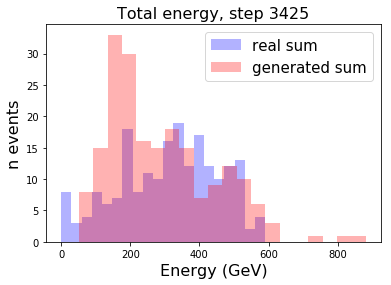

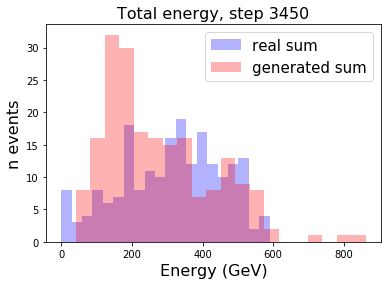

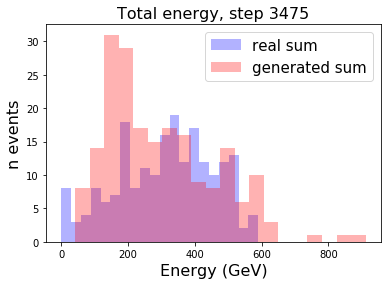

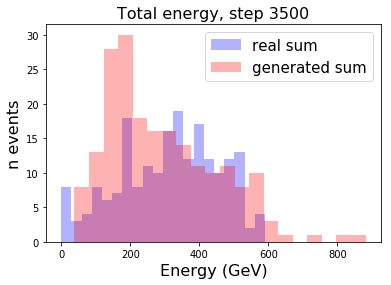

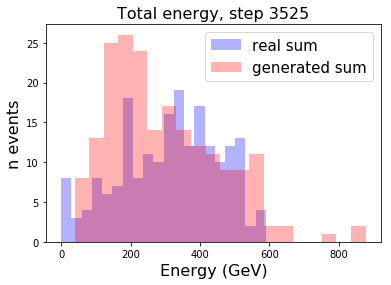

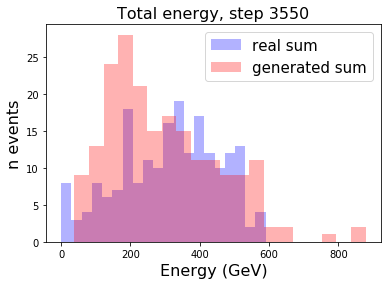

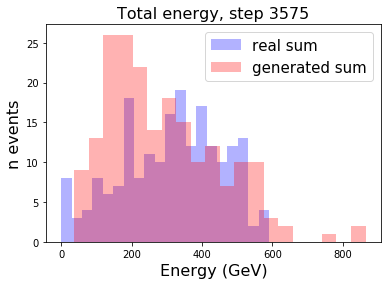

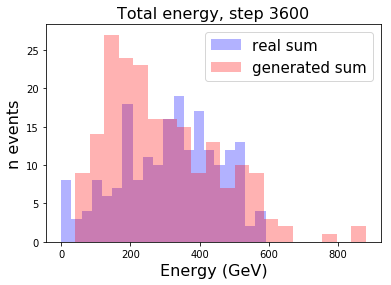

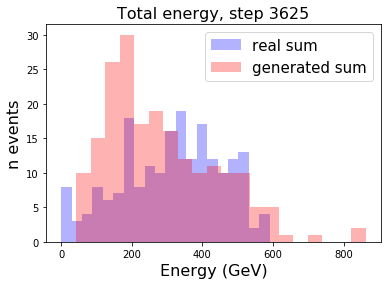

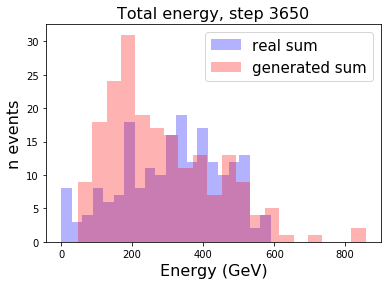

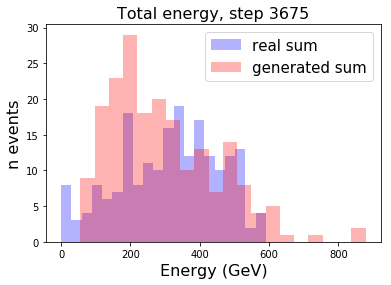

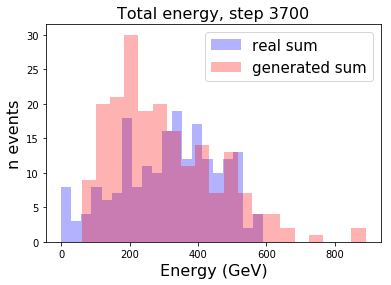

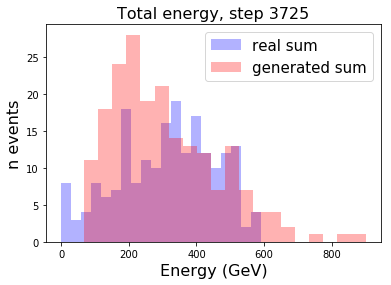

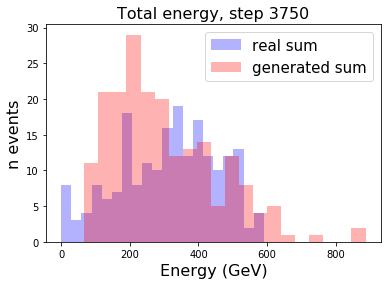

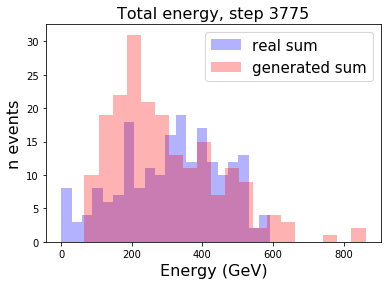

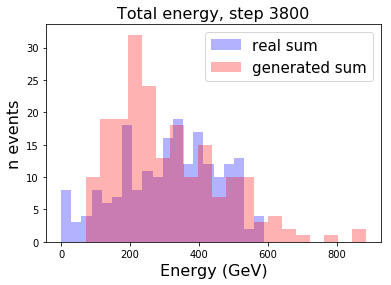

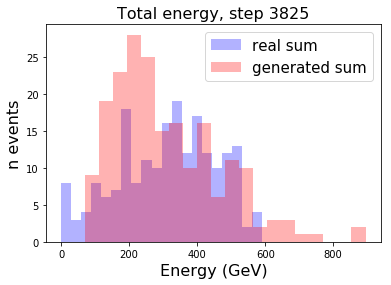

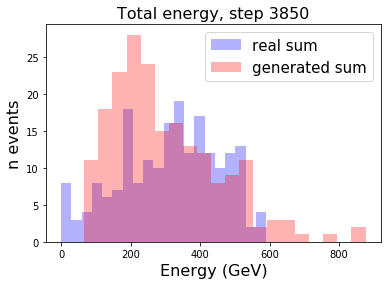

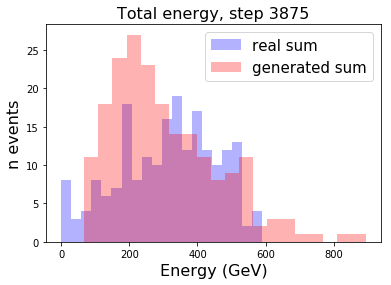

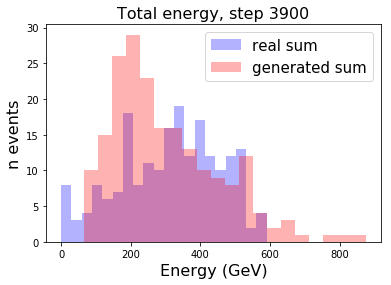

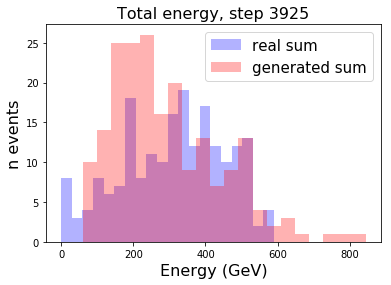

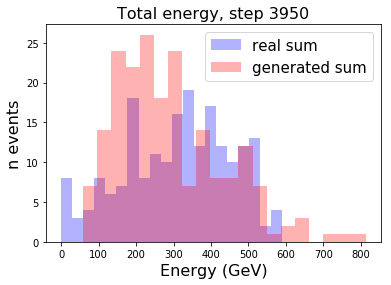

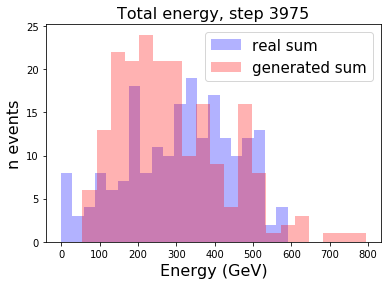

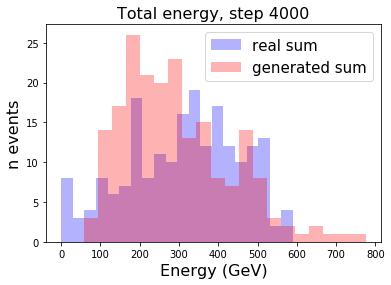

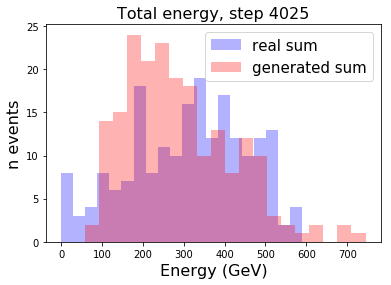

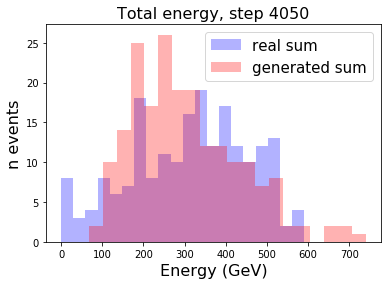

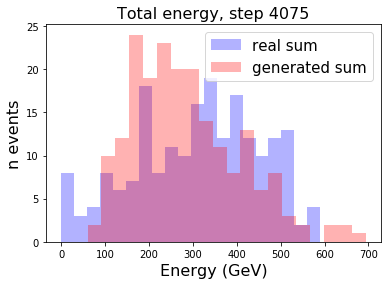

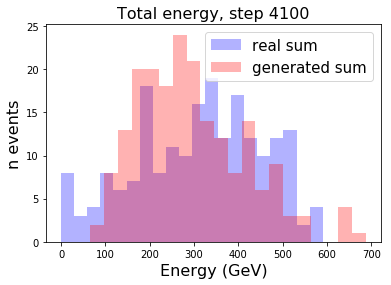

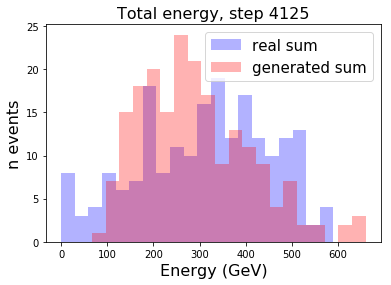

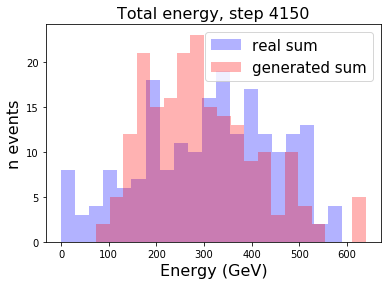

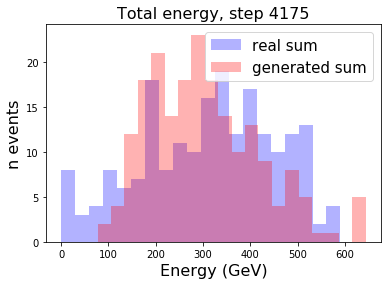

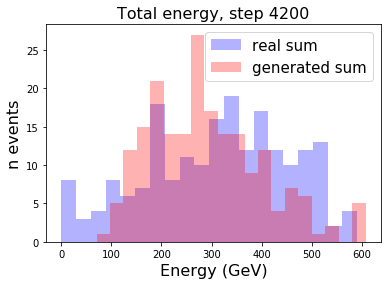

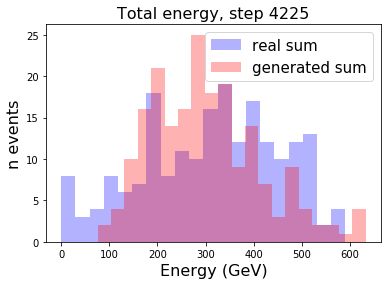

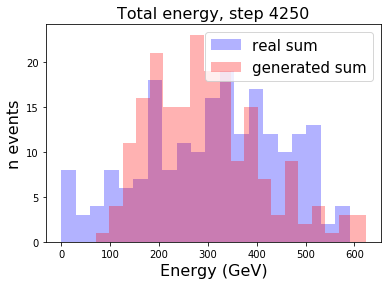

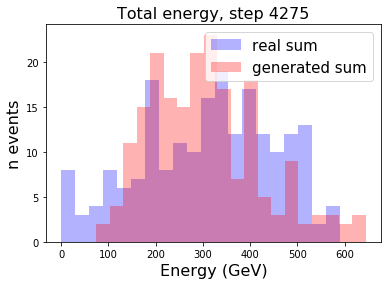

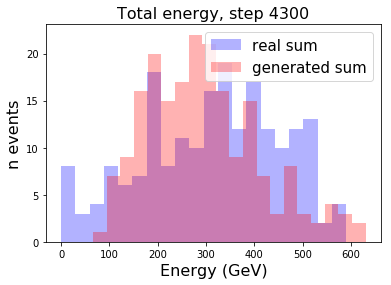

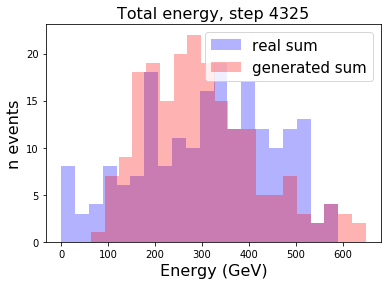

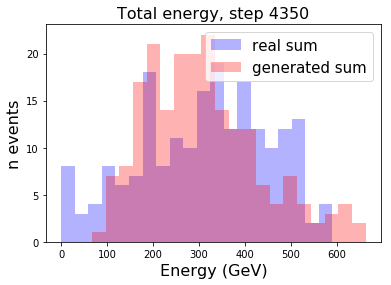

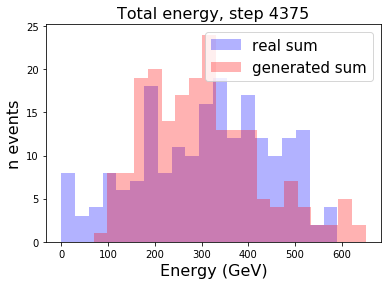

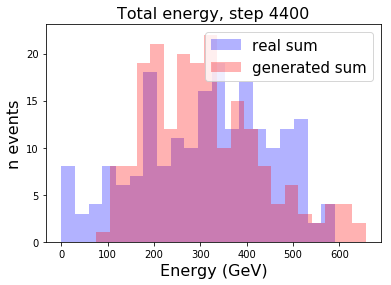

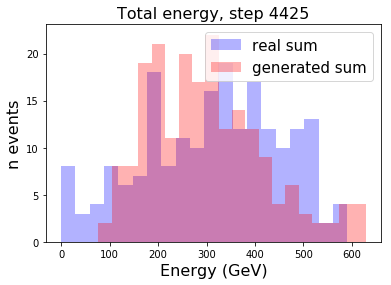

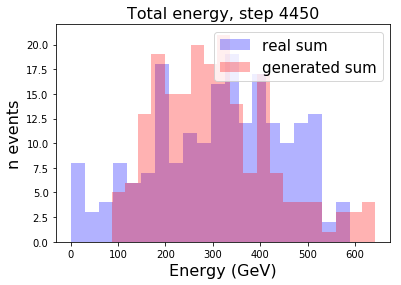

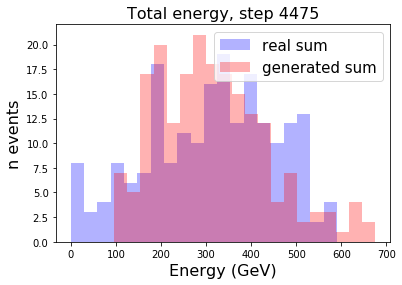

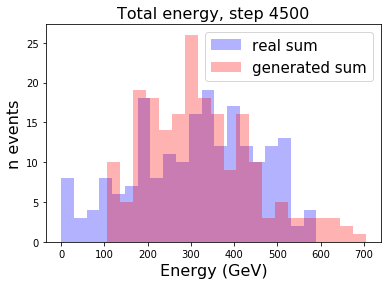

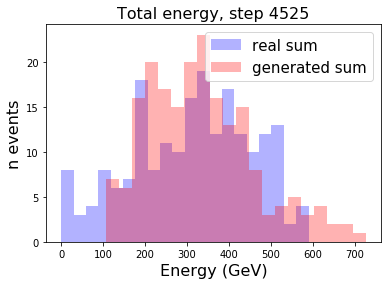

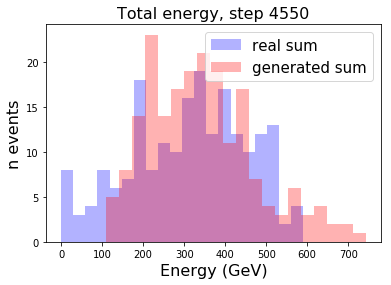

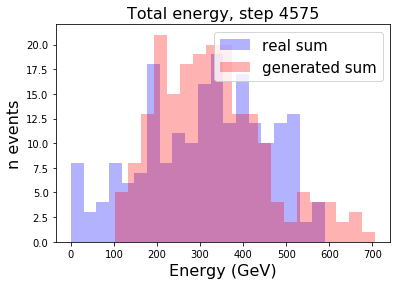

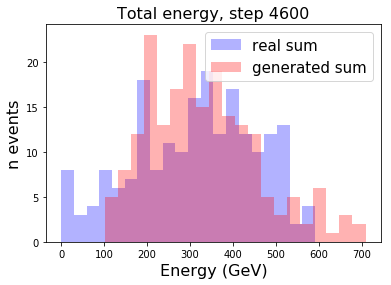

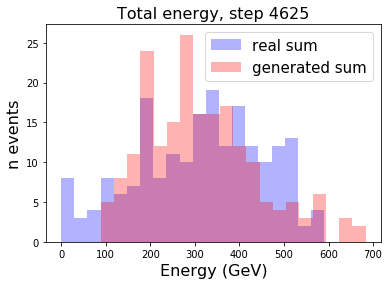

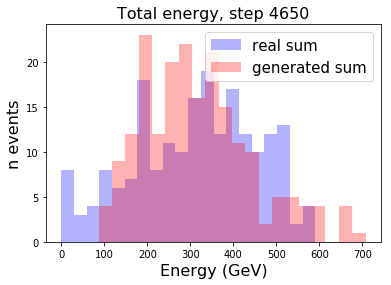

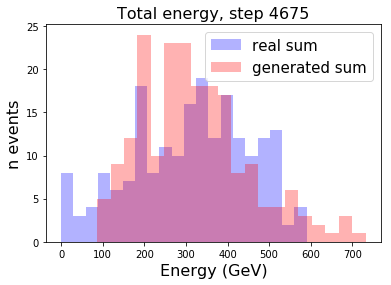

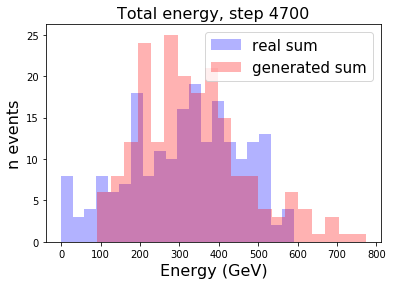

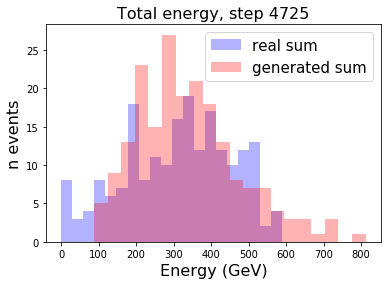

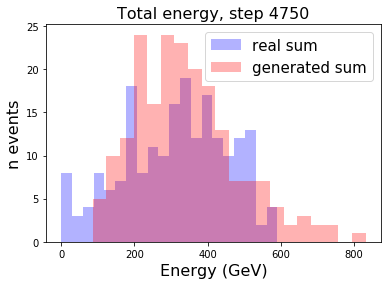

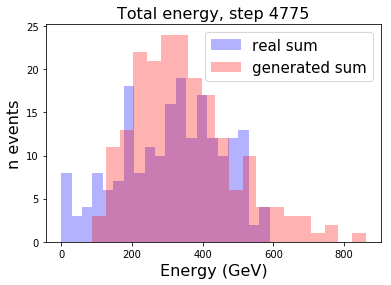

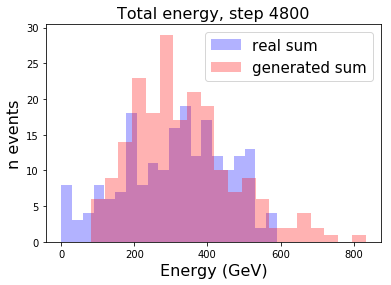

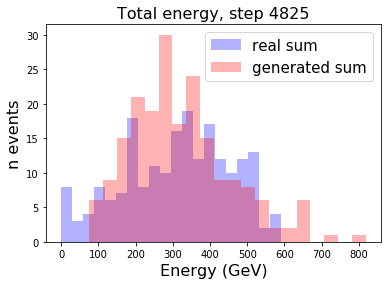

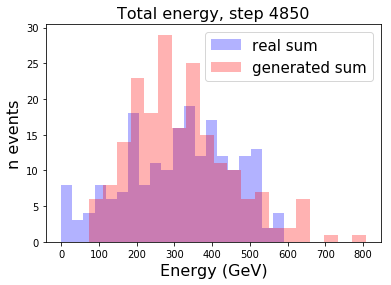

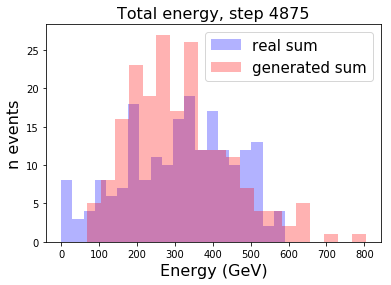

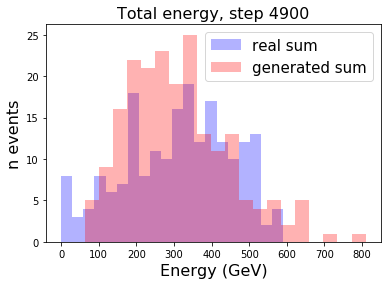

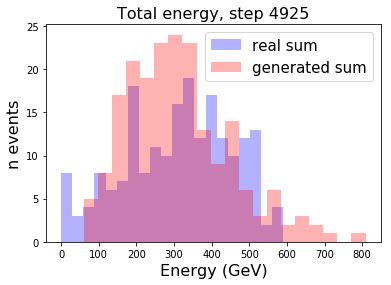

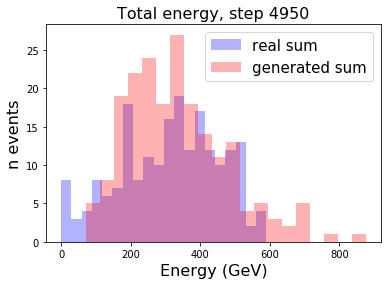

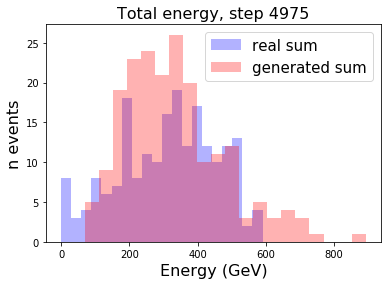

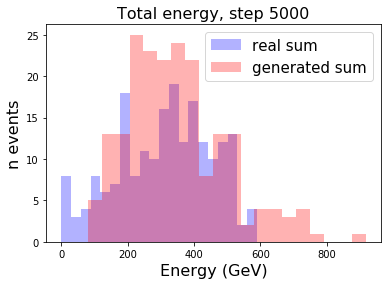

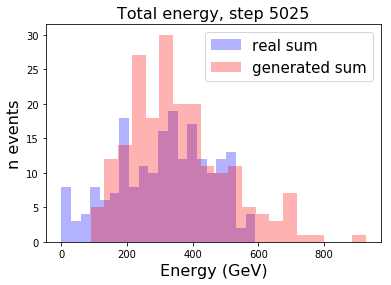

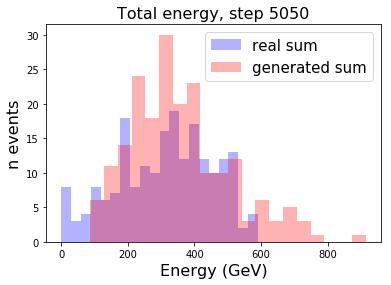

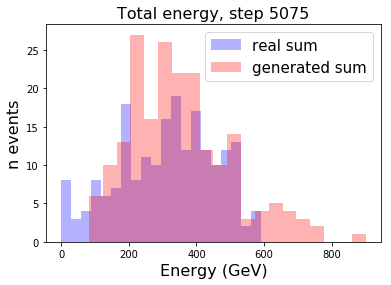

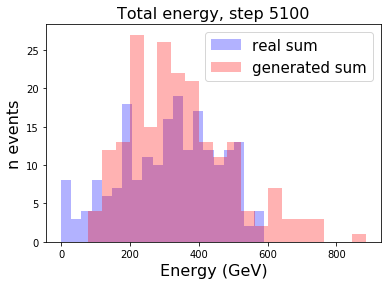

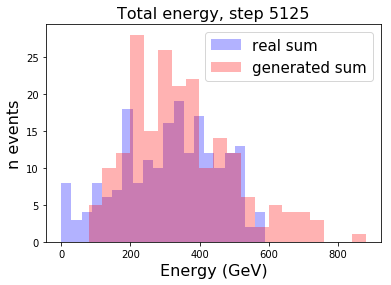

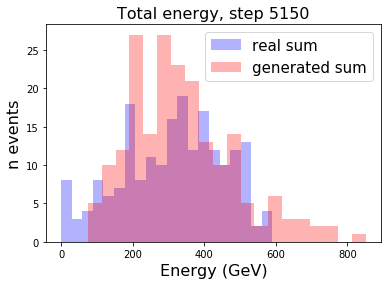

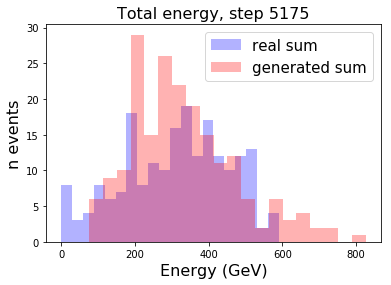

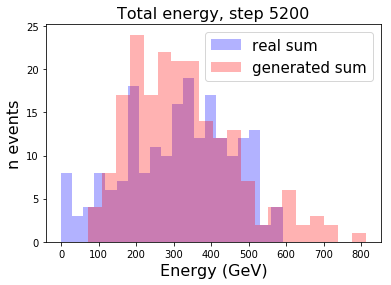

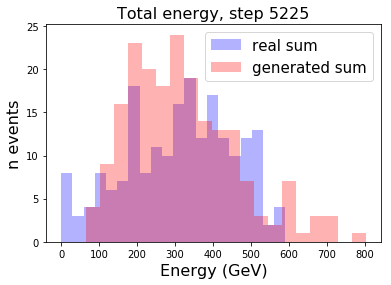

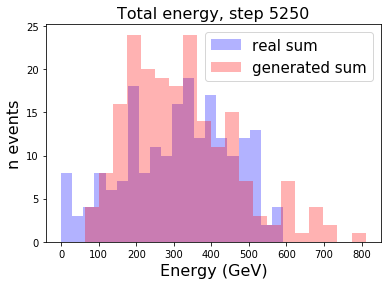

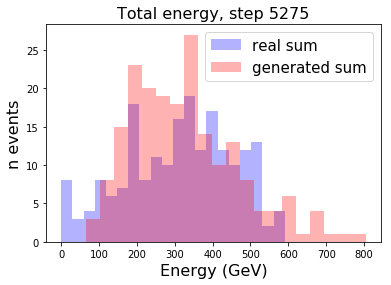

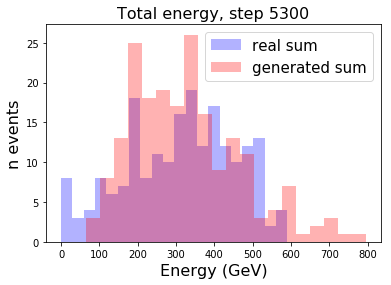

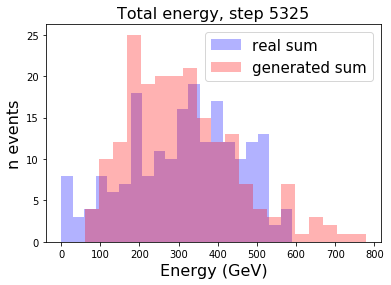

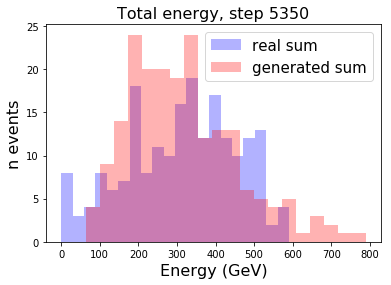

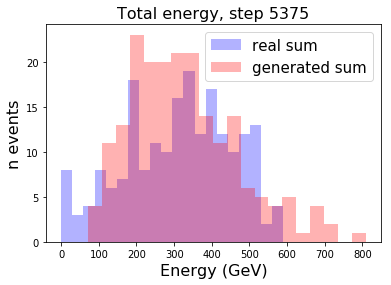

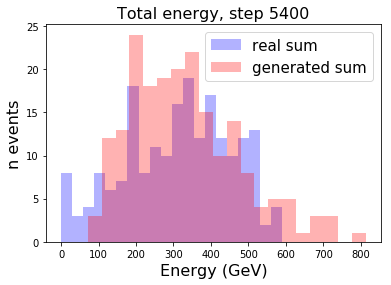

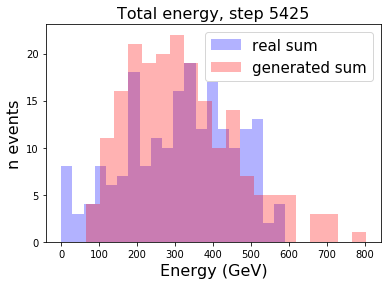

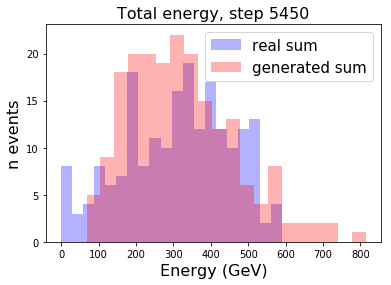

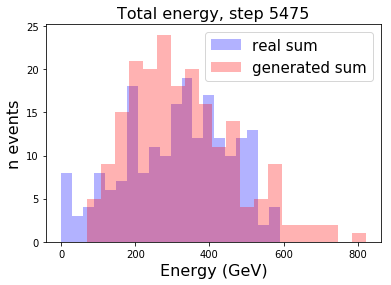

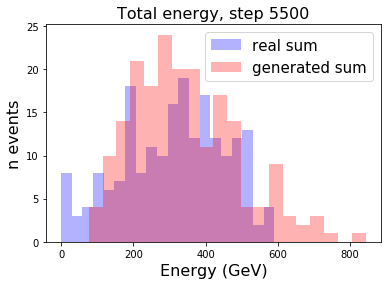

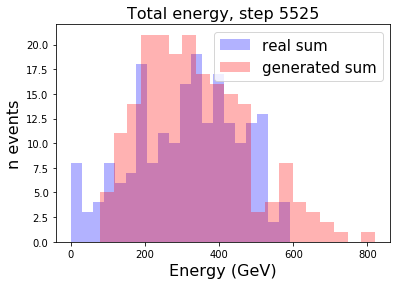

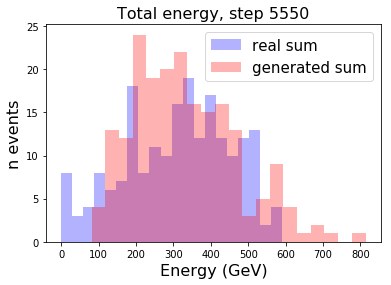

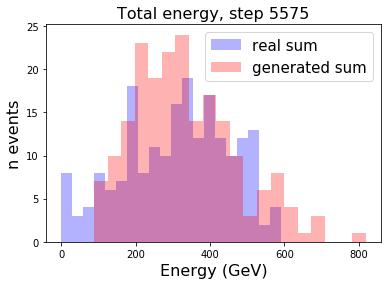

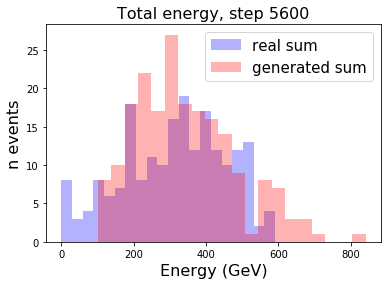

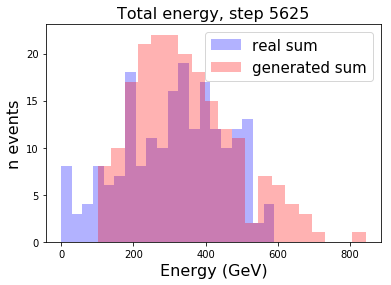

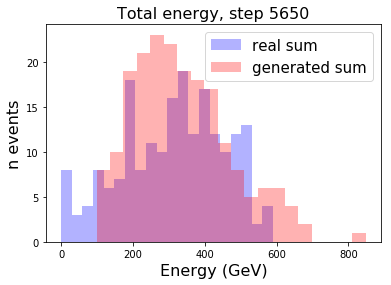

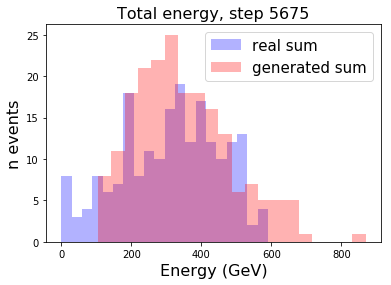

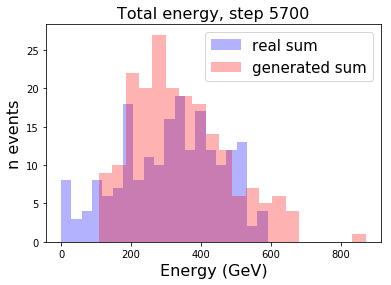

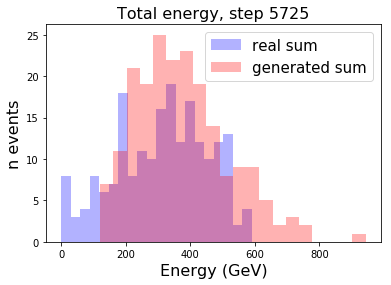

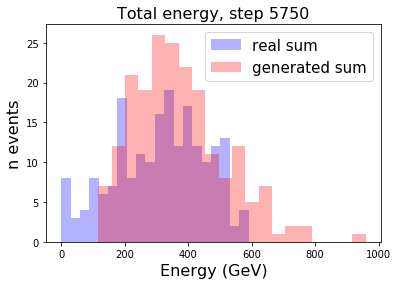

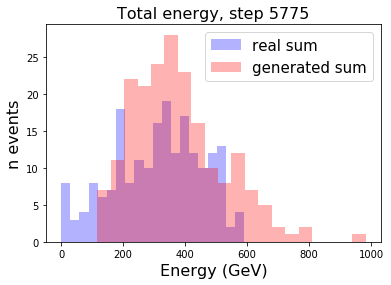

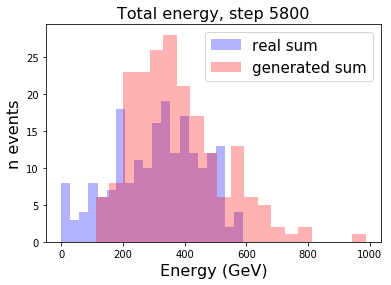

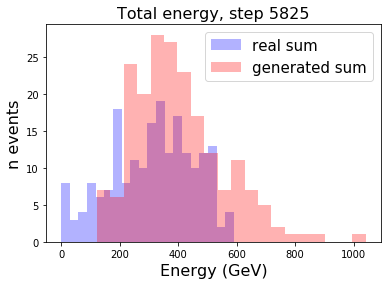

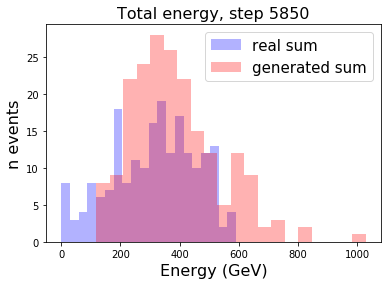

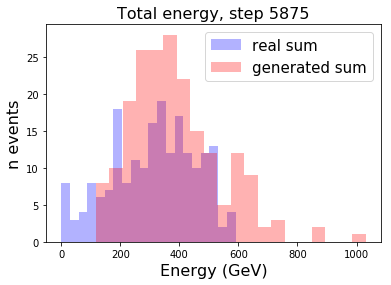

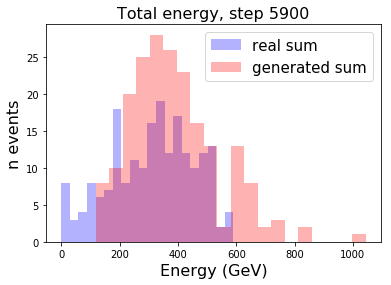

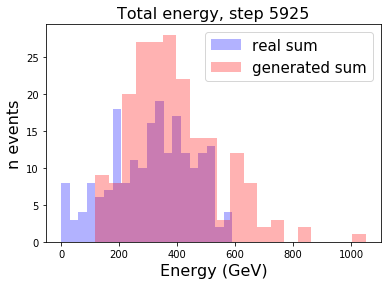

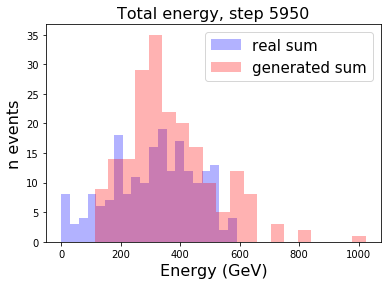

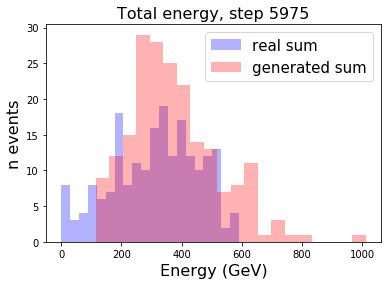

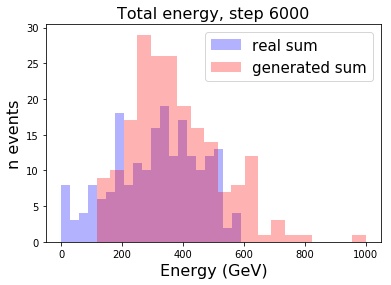

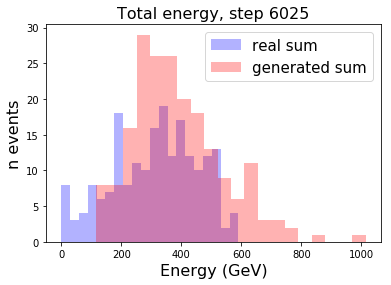

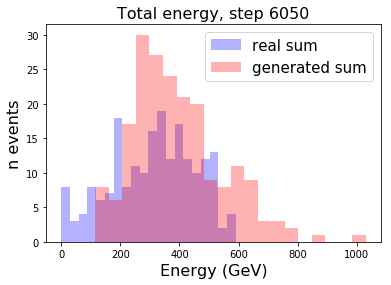

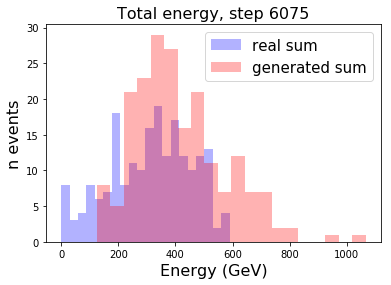

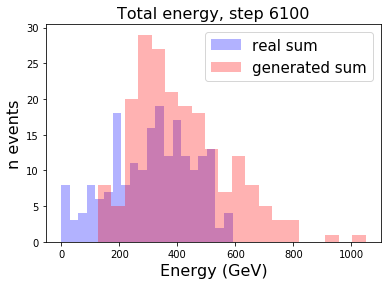

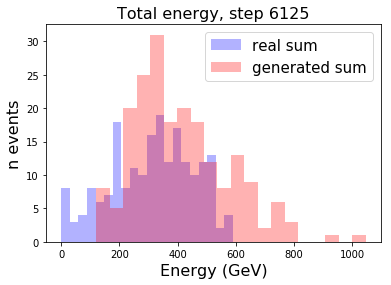

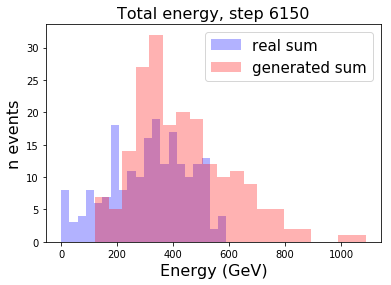

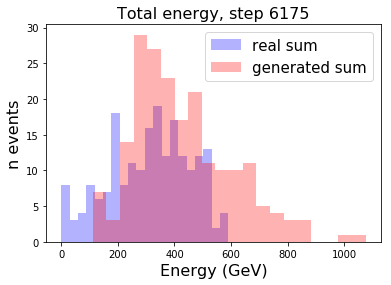

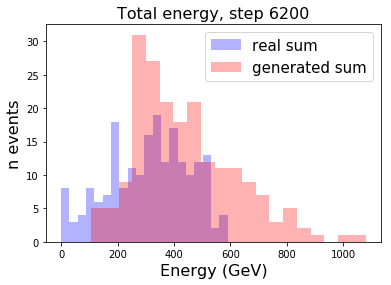

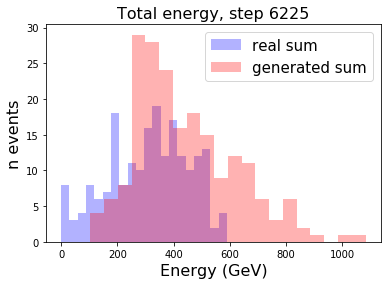

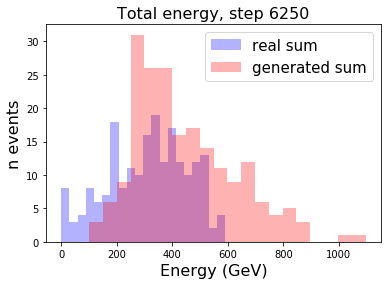

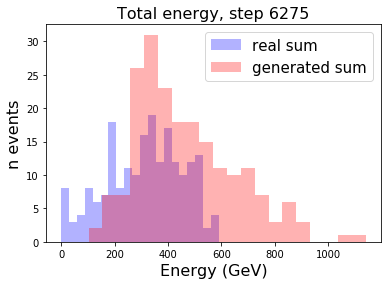

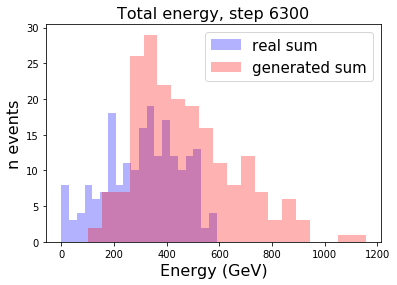

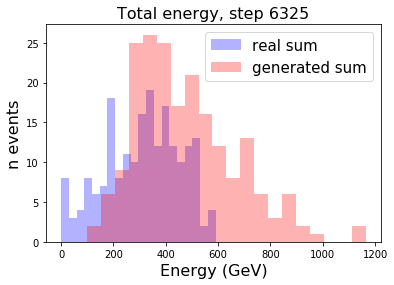

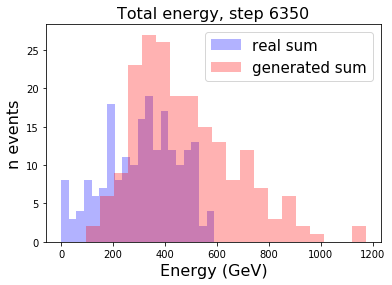

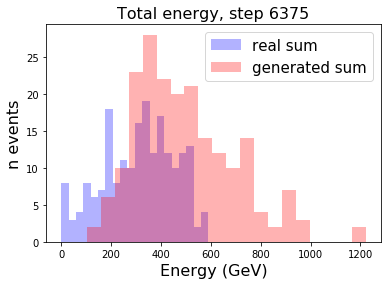

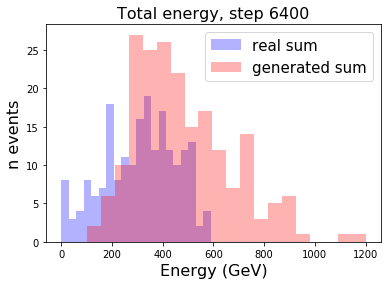

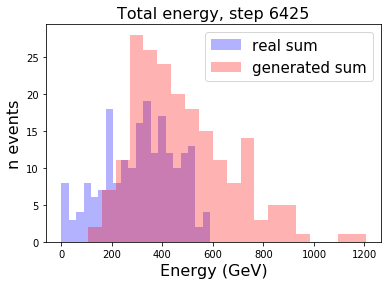

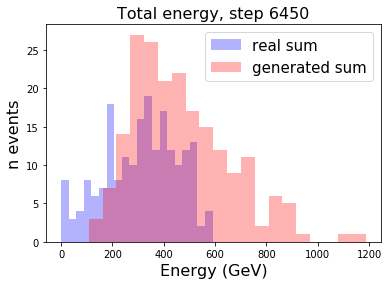

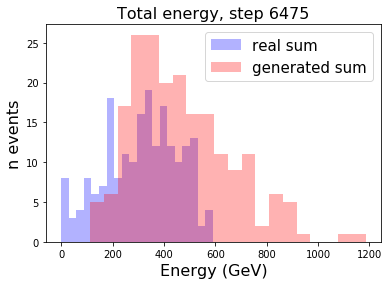

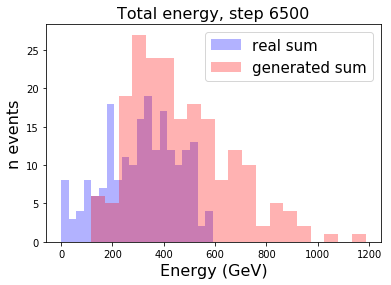

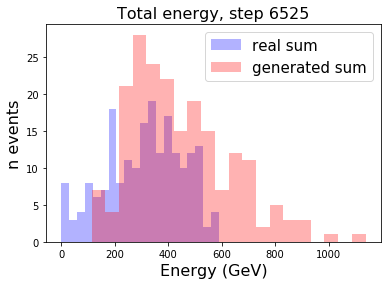

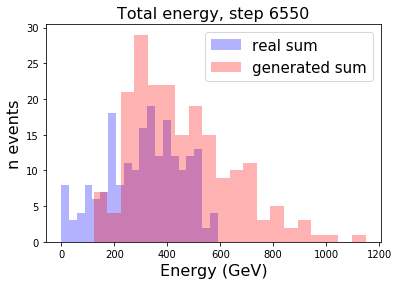

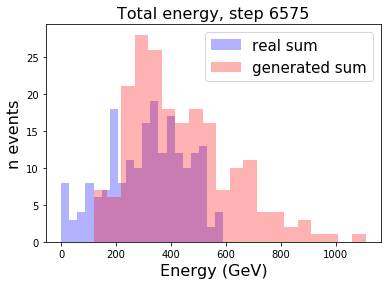

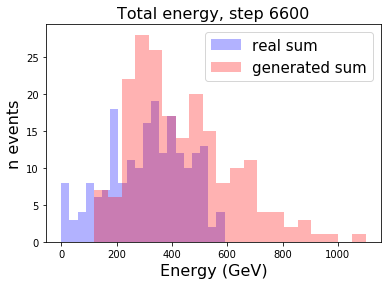

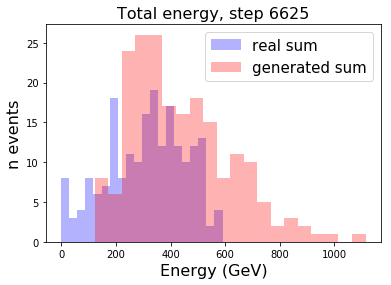

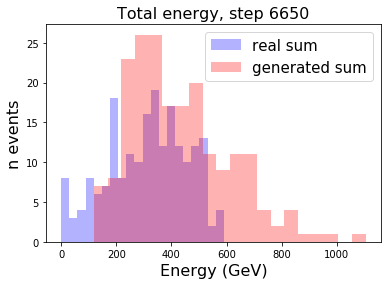

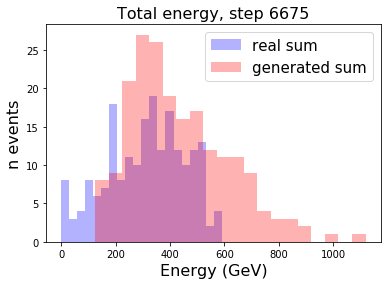

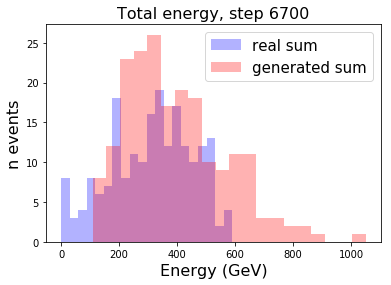

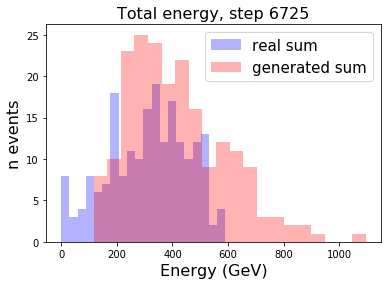

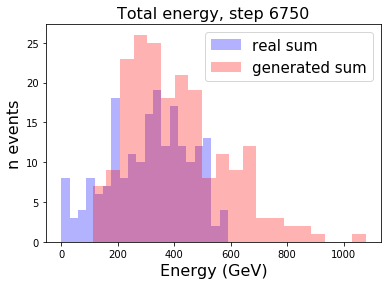

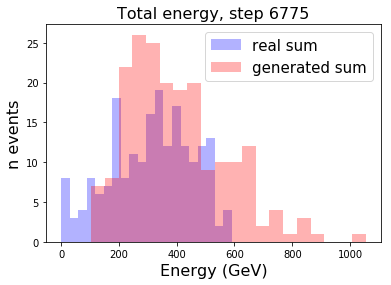

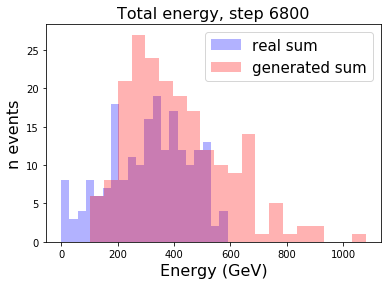

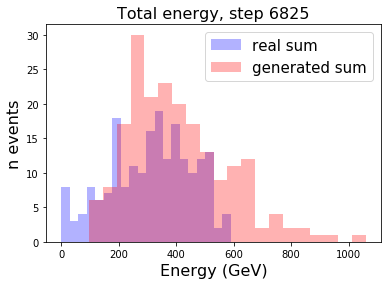

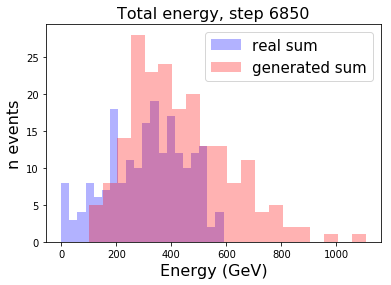

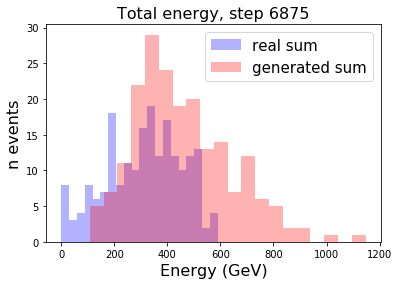

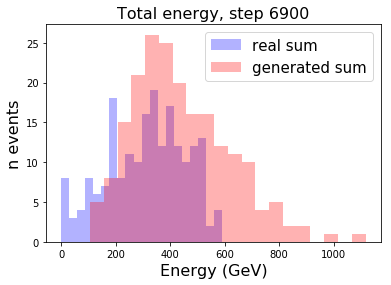

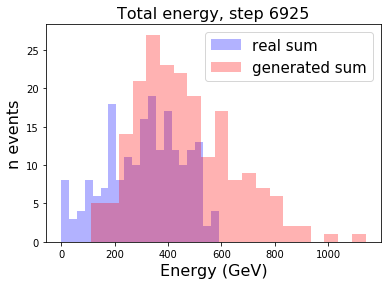

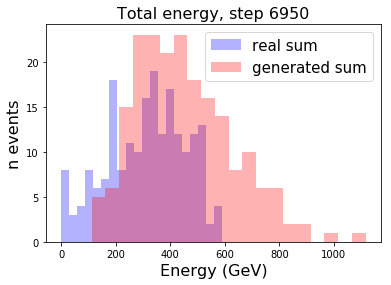

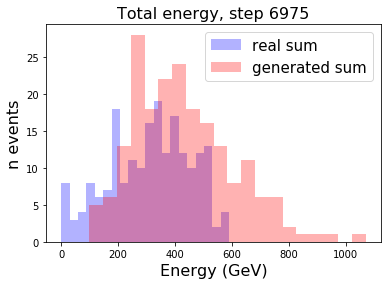

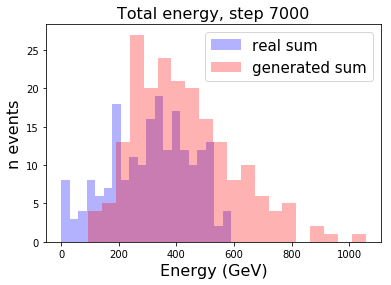

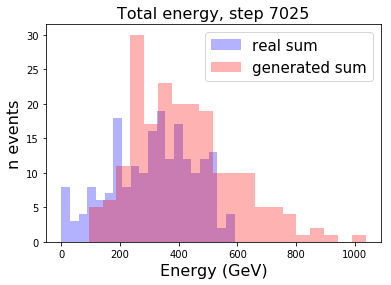

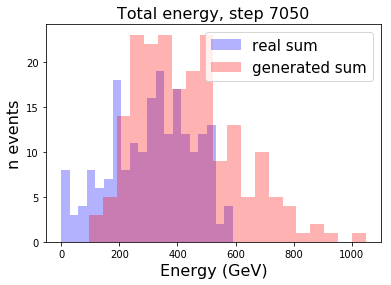

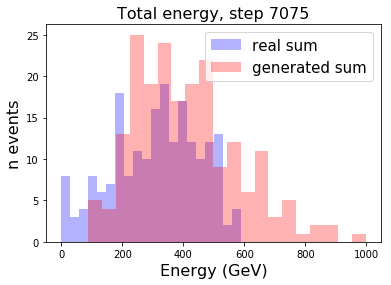

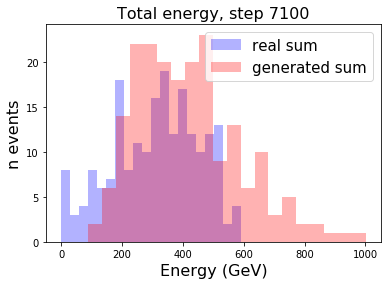

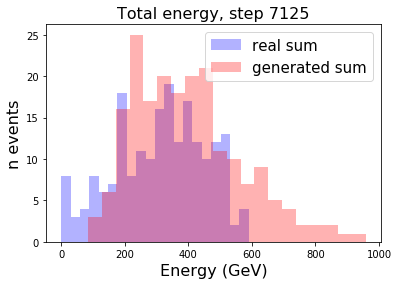

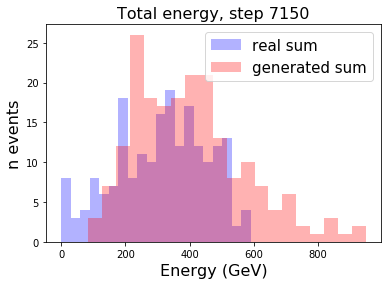

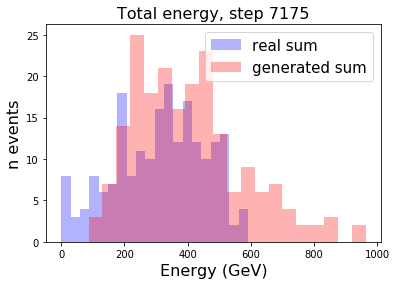

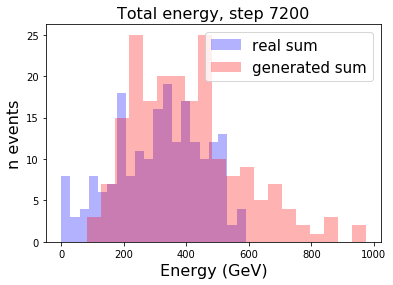

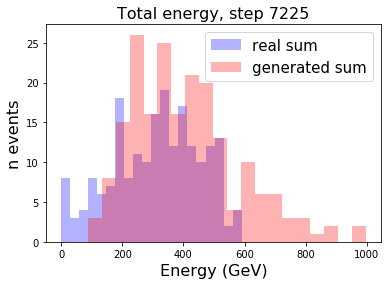

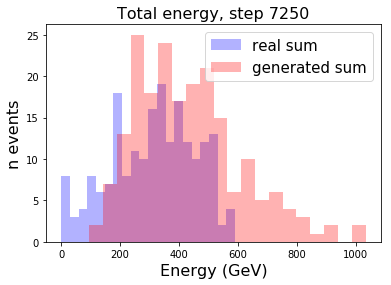

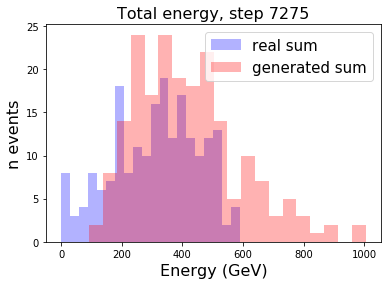

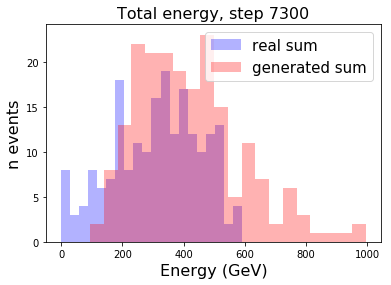

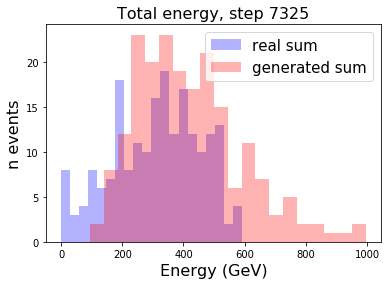

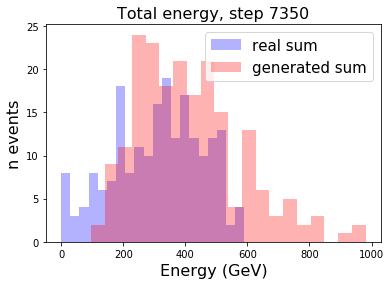

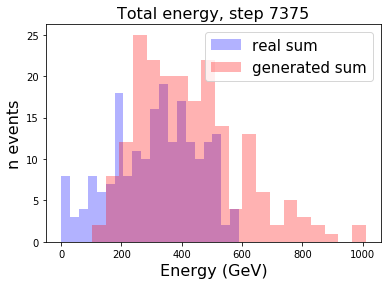

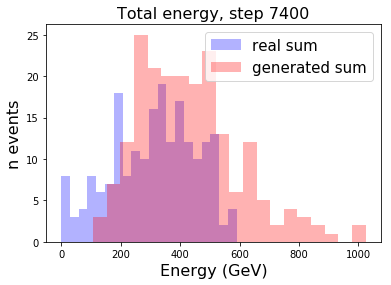

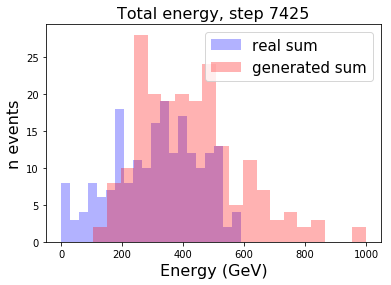

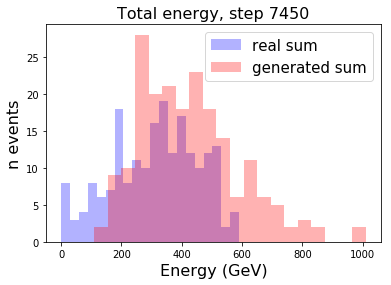

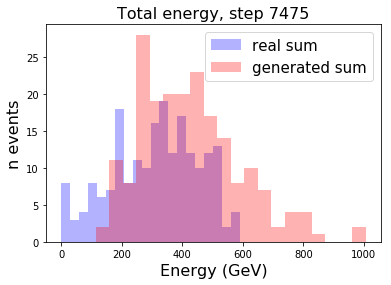

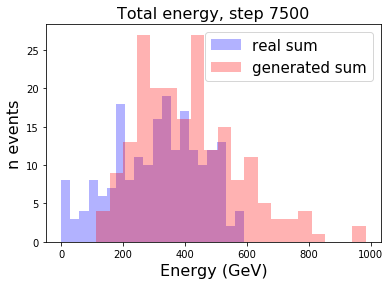

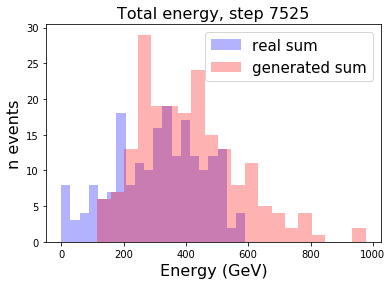

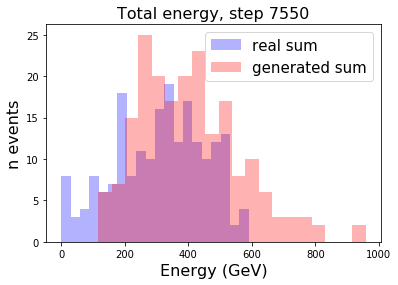

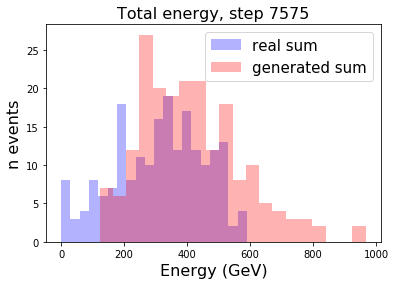

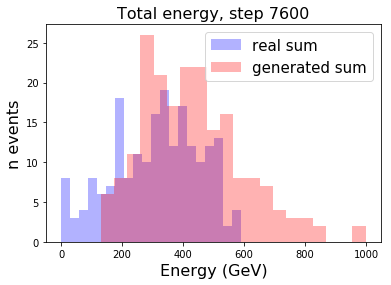

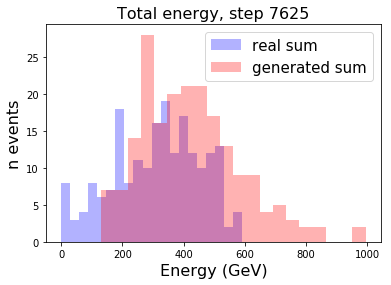

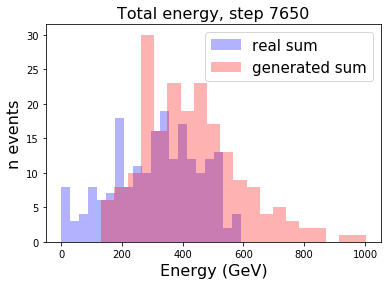

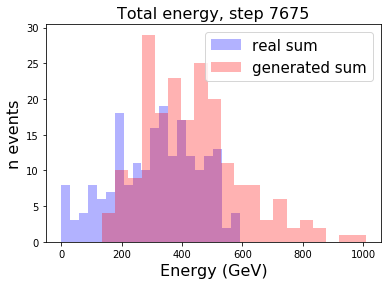

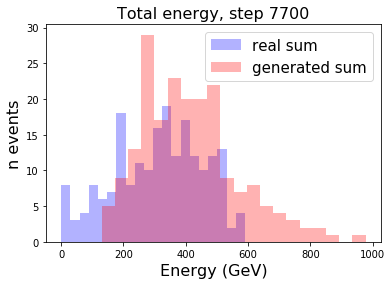

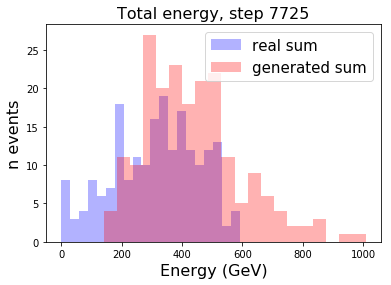

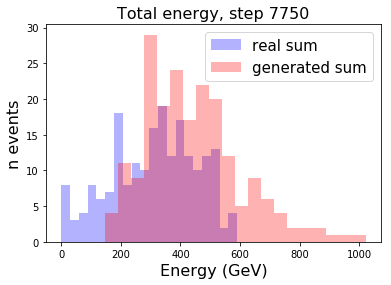

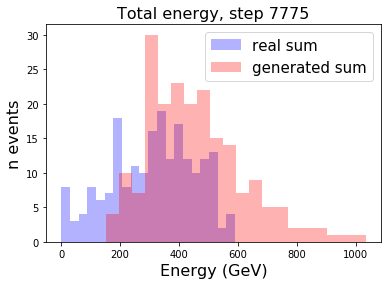

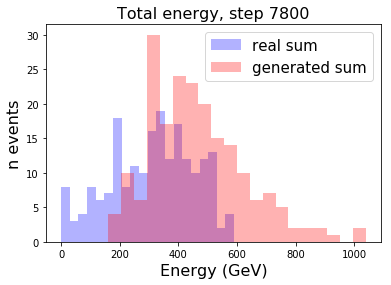

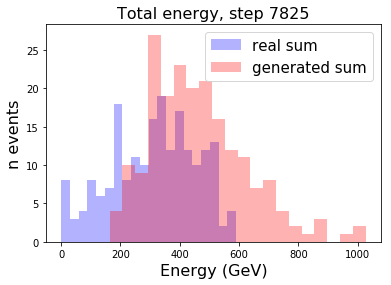

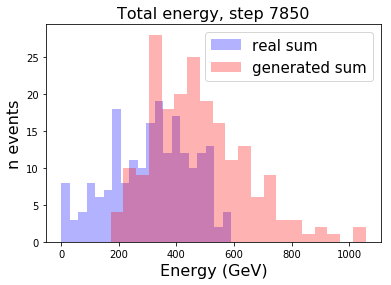

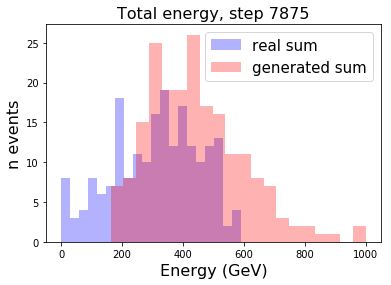

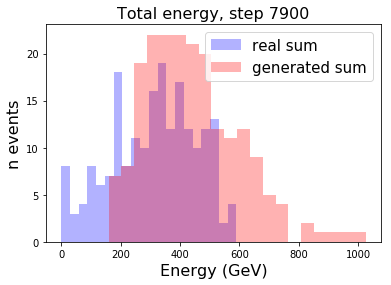

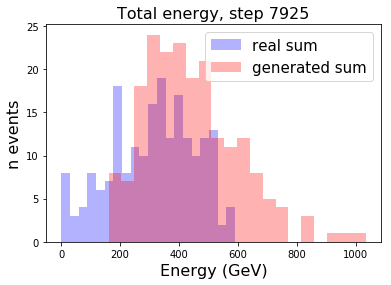

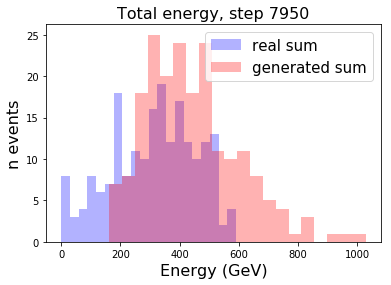

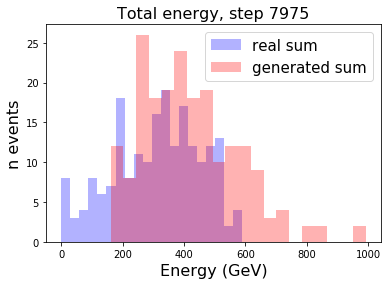

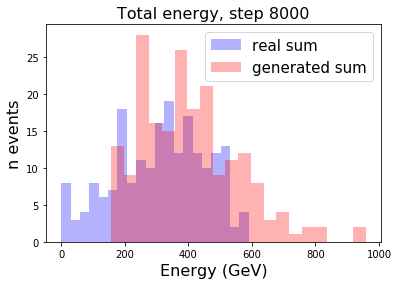

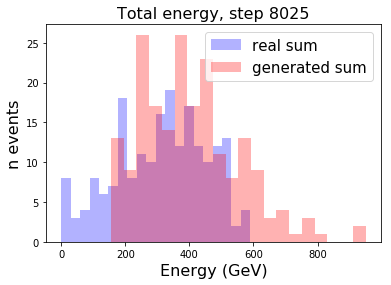

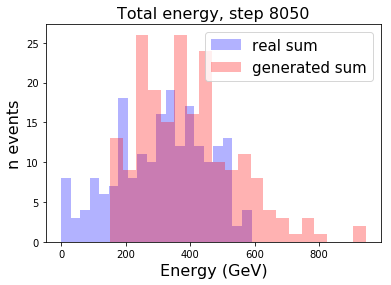

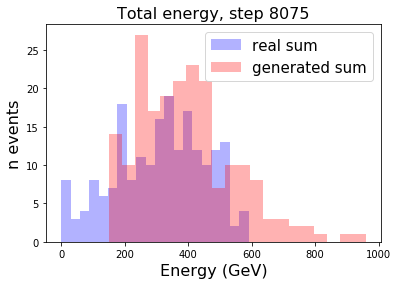

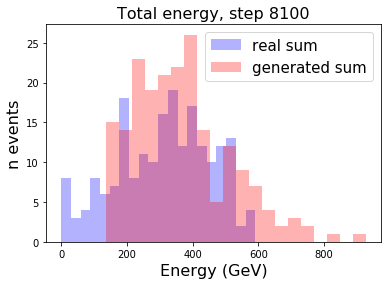

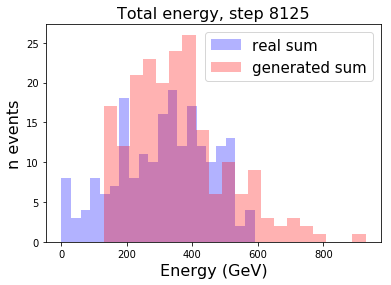

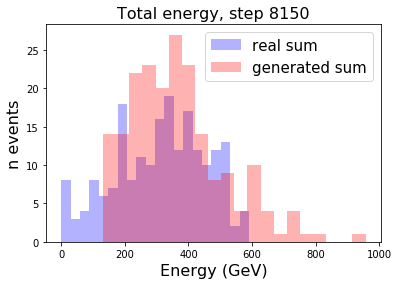

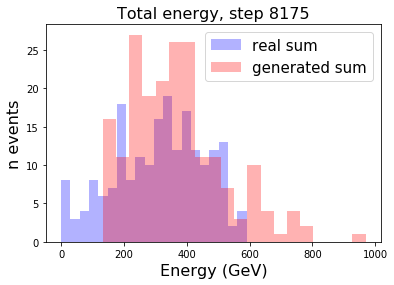

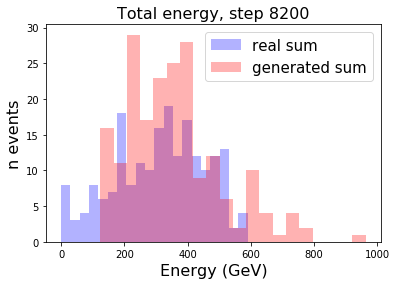

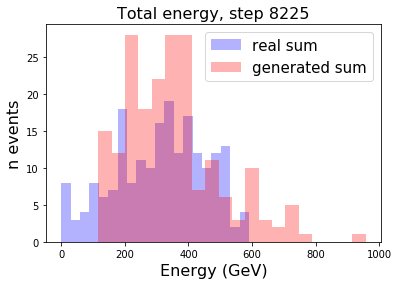

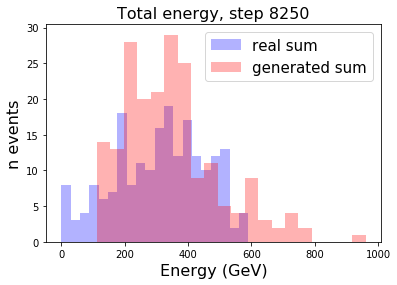

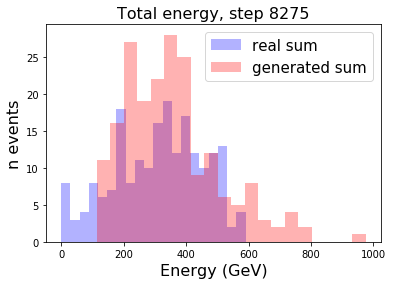

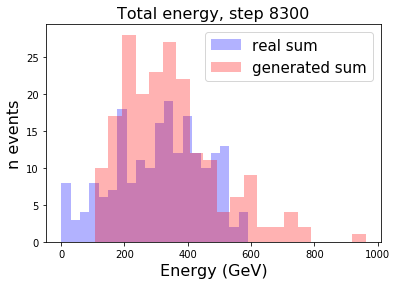

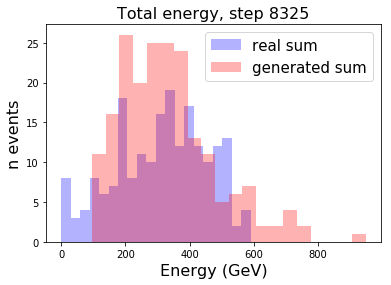

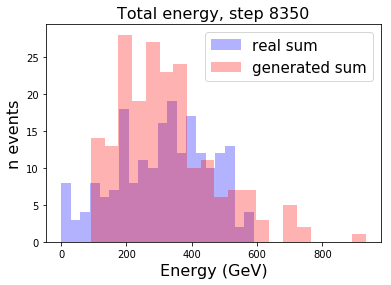

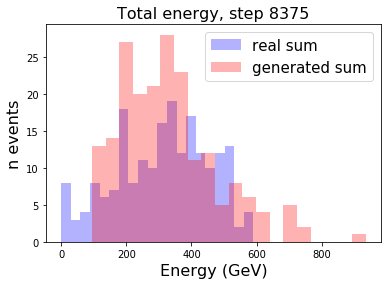

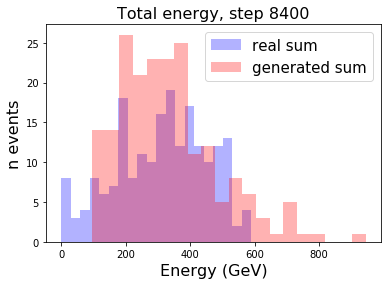

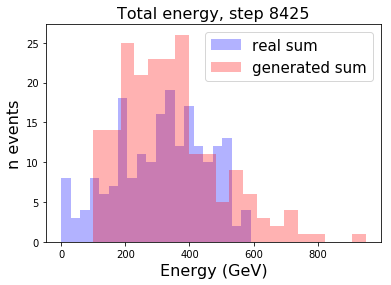

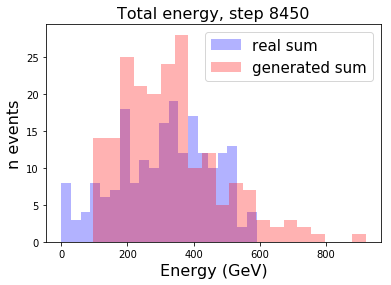

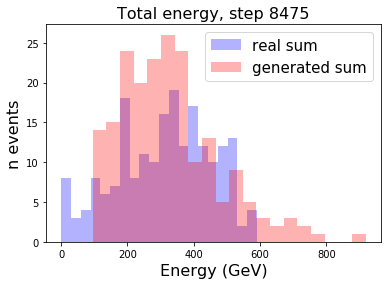

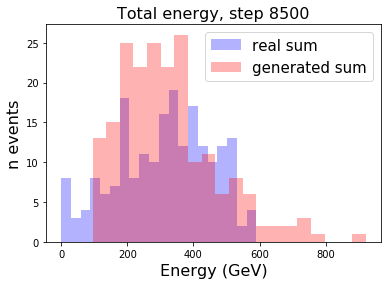

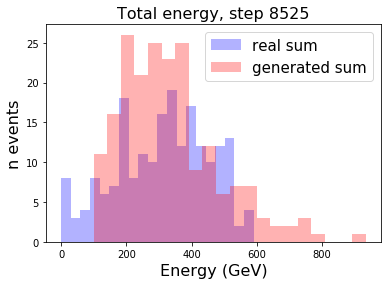

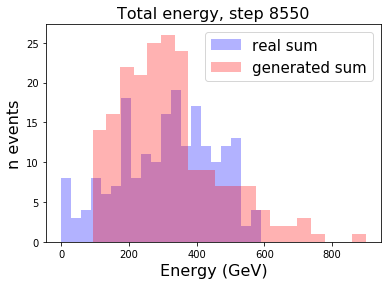

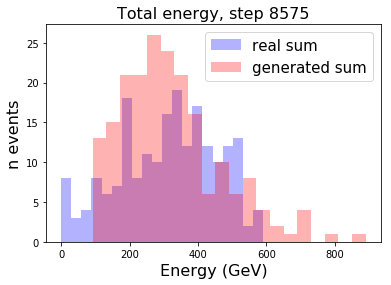

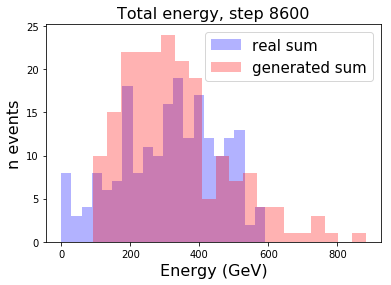

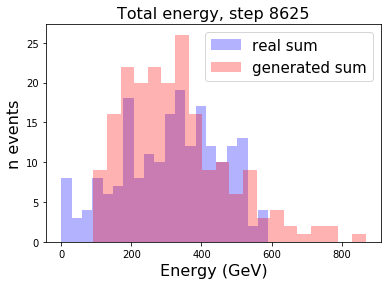

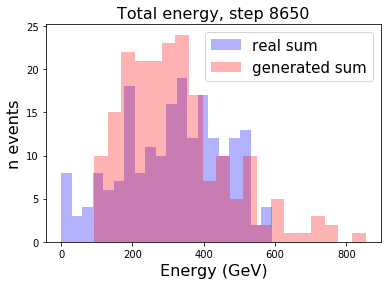

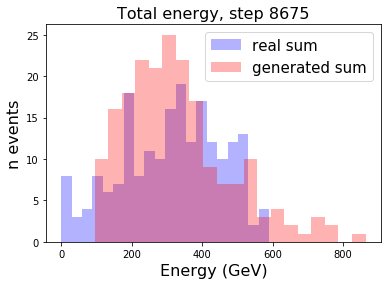

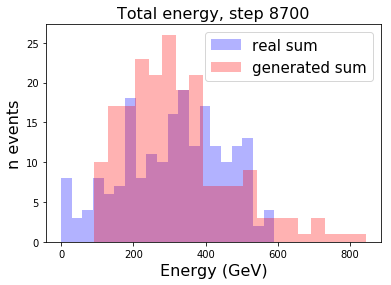

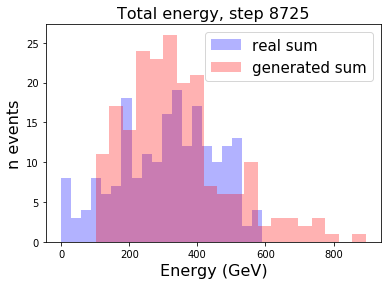

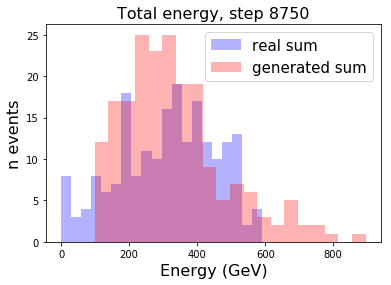

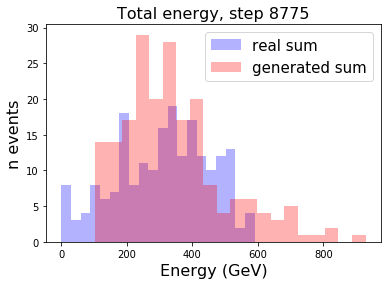

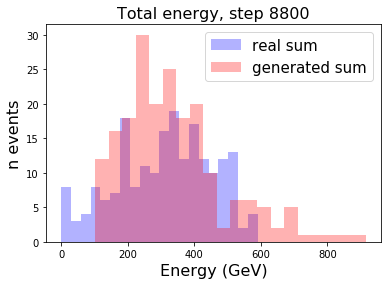

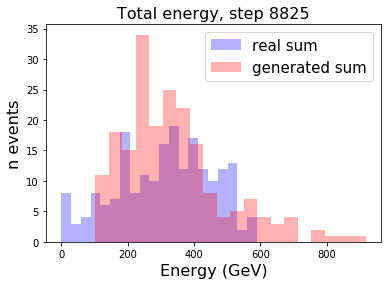

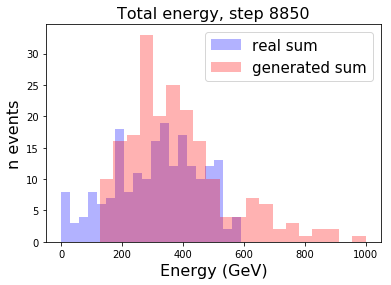

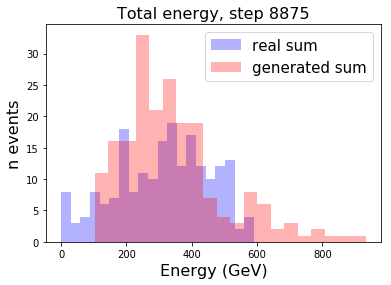

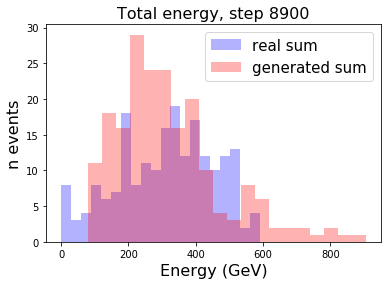

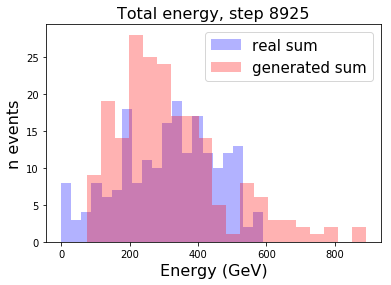

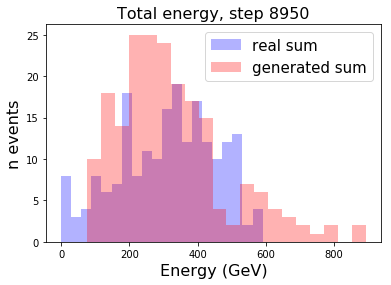

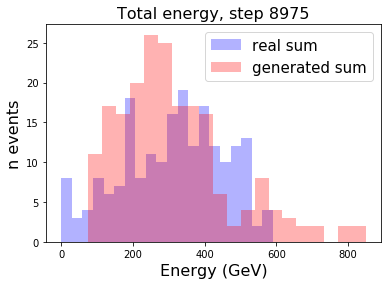

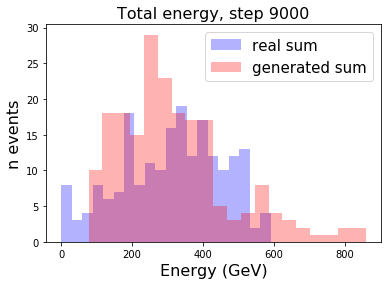

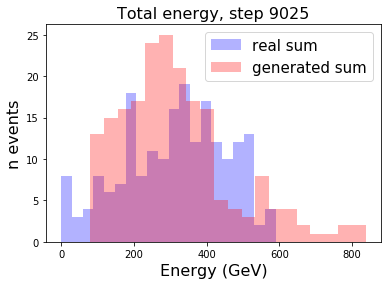

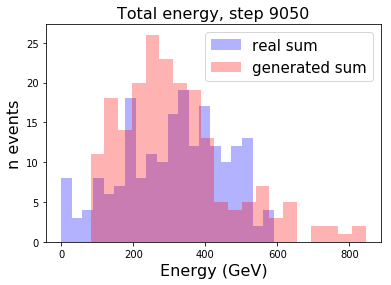

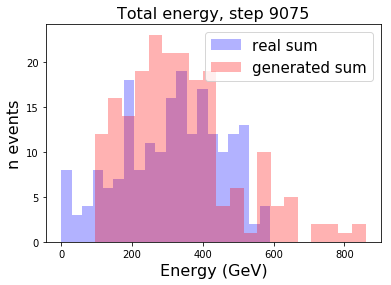

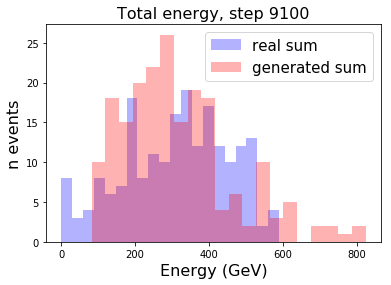

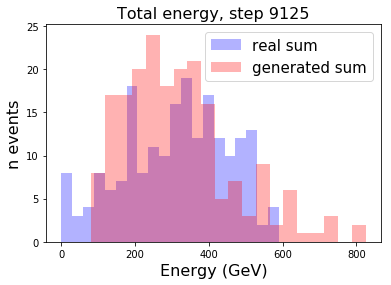

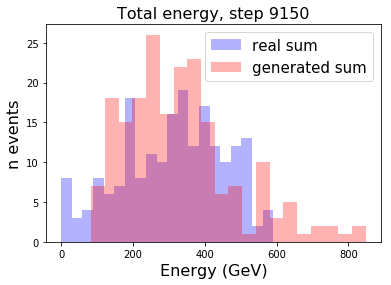

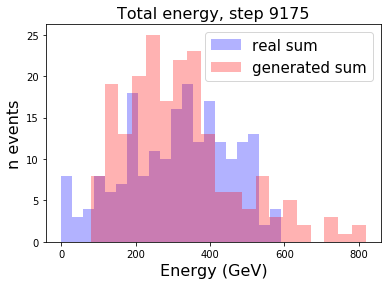

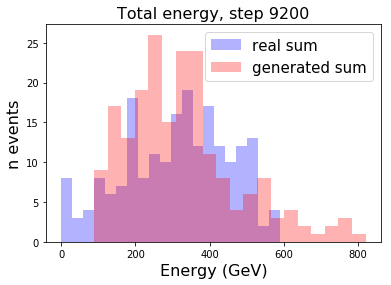

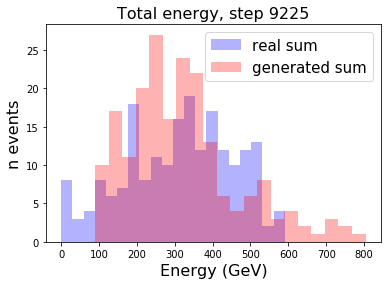

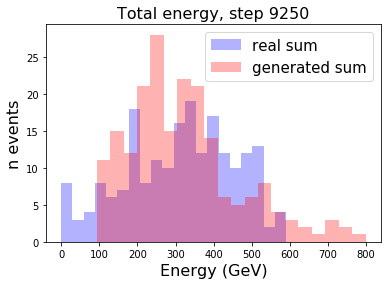

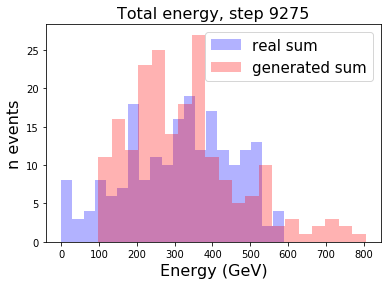

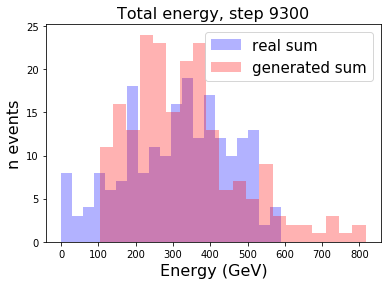

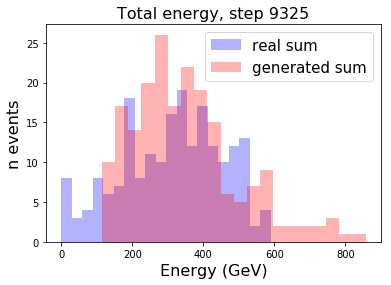

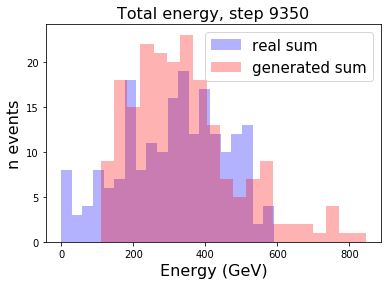

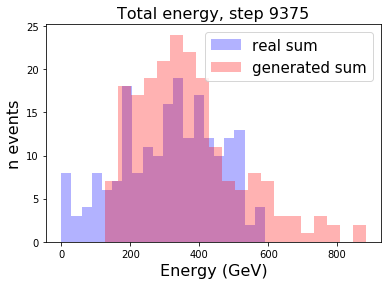

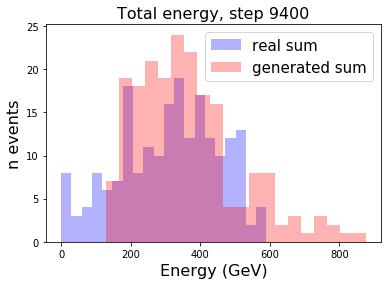

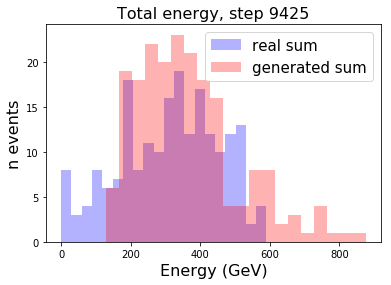

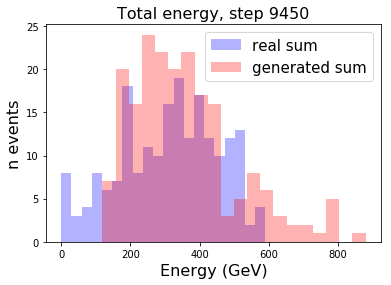

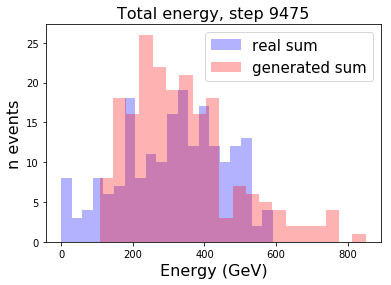

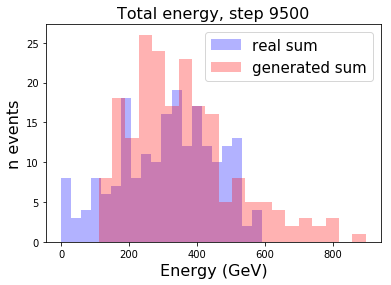

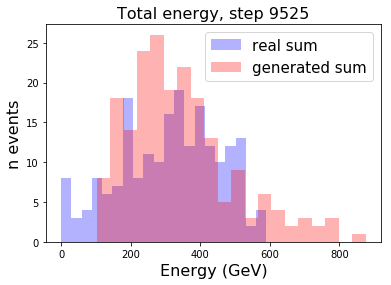

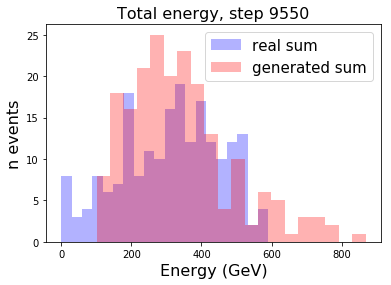

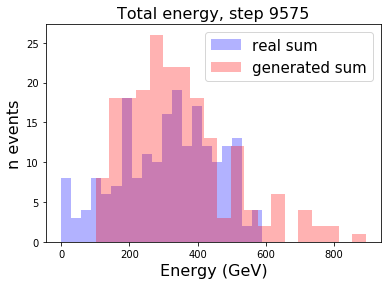

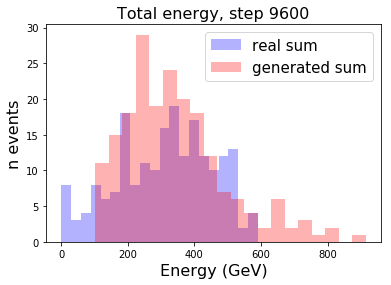

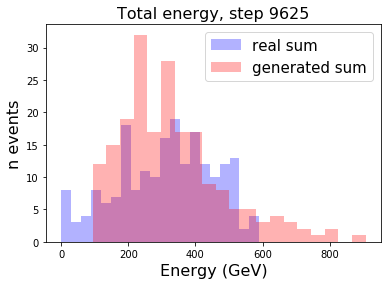

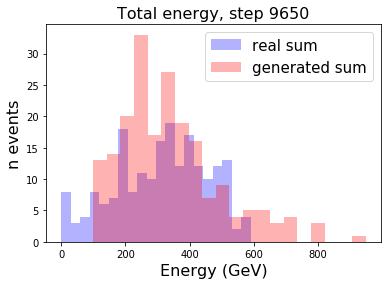

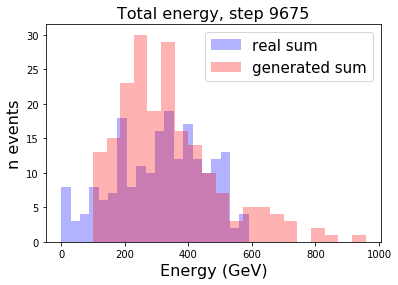

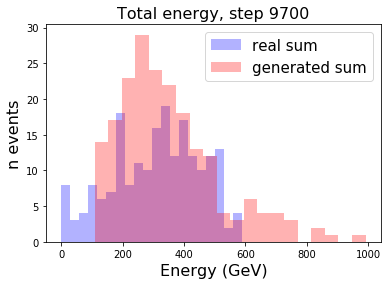

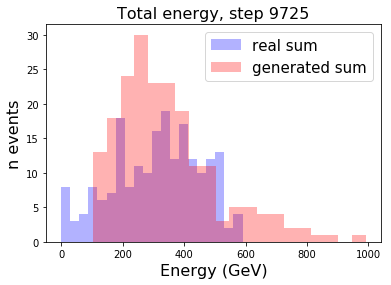

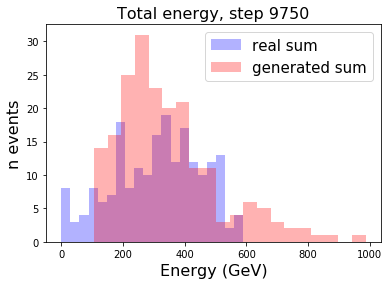

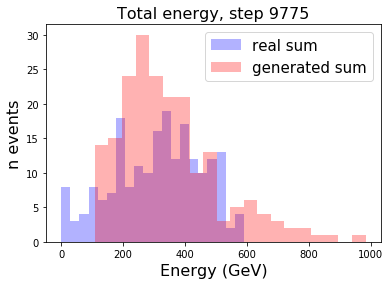

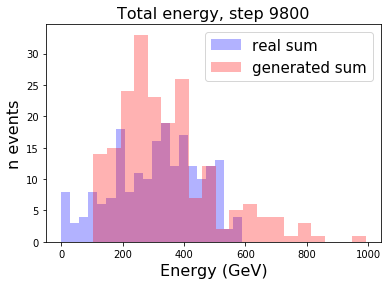

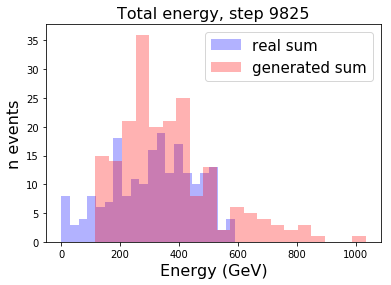

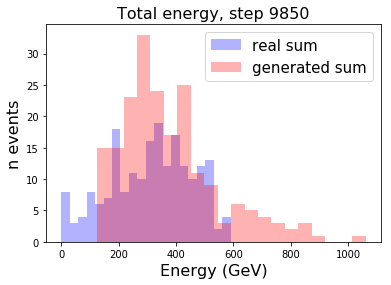

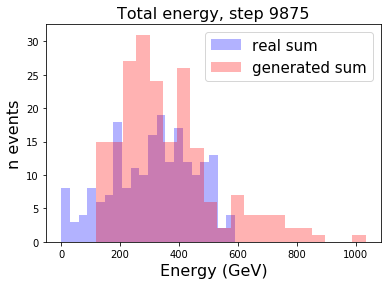

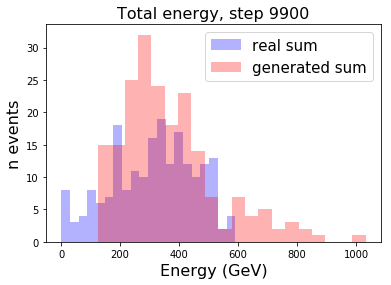

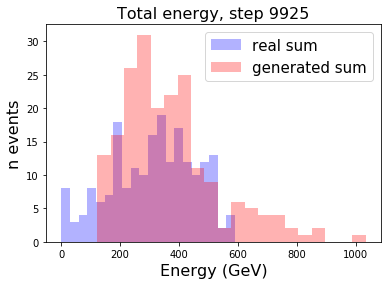

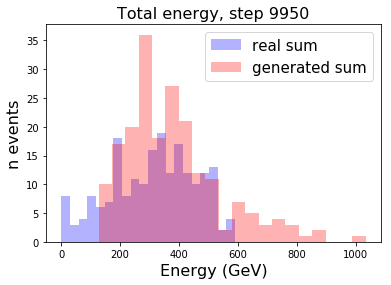

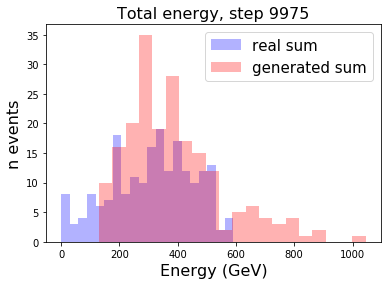

In [4]:
plotSumHist(inp_sum, all_g_weight2, gen_model2)

In [ ]:
## Plot ratios
gen_model1 = '/nfshome/vitoriabp/hgcal_wgan/trial23/weights/generator_model_bs_128_lr_0.00005_latent_100_ncritic_5_clip_0.01_shuffle.json'
g_weight1 = '/nfshome/vitoriabp/hgcal_wgan/trial23/weights/generator_weights_epoch_2925_bs_128_lr_0.00005_latent_100_ncritic_5_clip_0.01_shuffle.h5'

g = loadModel(gen_model1)
g.load_weights(g_weight1)
generated_images = g.predict(noise)

x = plotHistogram(inp_sum, gen_sum, bins=10)

na = x[0][0]
bina = x[0][1]

nb = x[1][0]
binb = x[1][1]

energies = np.linspace(start=min(min(bina), min(binb)), stop=max(max(bina), max(binb)), num=10)

ratios = np.log(np.max([nb, np.ones(len(nb))*1E-4], axis=0) / np.max([na, np.ones(len(na))*1E-4], axis=0))

plt.plot(energies, ratios)
plt.scatter(energies, ratios)
plt.xlabel("Energy (GeV)", size=16)
plt.ylabel("ln(fake/real)", size=16)